# Second-Harmonic Nonlinear Electrochemical Impedance Spectroscopy: II. Experimental Approach and Analysis of lithium-ion battery Experiments

### Yuefan Ji and Daniel T. Schwartz<br>*Department of Chemical Engineering & Clean Energy Institute,<br>University of Washington*

# Supplementary Notebook (Part II)

## List of Figures

### - [Figure 1. Sequential Optimization for 10% SoC fresh and aged cell](#Figure-1.-Sequential-Optimization-for-10%25-SoC-fresh-and-aged-cell)
### - [Figure 2. Sequential Optimization for 30% SoC fresh and aged cell](#Figure-2.-Sequential-Optimization-for-30%25-SoC-fresh-and-aged-cell)
### - [Figure 3. Sequential Optimization for 50% SoC fresh and aged cell](#Figure-3.-Sequential-Optimization-for-50%25-SoC-fresh-and-aged-cell)
<!-- ### - [Figure 4. Sequential Optimization at 30% SoC with different initial conditions](#Figure-4.-Sequential-Optimization-at-30%25-SoC-with-different-initial-conditions) -->
### - [Figure 4. Simultaneous Optimization for 10% SoC fresh and aged cell](#Figure-5.-Simultaneous-Optimization-for-10%25-SoC-fresh-and-aged-cell)
### - [Figure 5. Simultaneous Optimization for 30% SoC fresh and aged cell](#Figure-6.-Simultaneous-Optimization-for-30%25-SoC-fresh-and-aged-cell)
### - [Figure 6. Simultaneous Optimization for 50% SoC fresh and aged cell](#Figure-7.-Simultaneous-Optimization-for-50%25-SoC-fresh-and-aged-cell)
### - [Figure 7. Sensitivity to State of Health (SoH)](#Figure-8.-Sensitivity-to-State-of-Health-%28SoH%29)
### - [Figure 8. Sensitivity to State of Charge (SoC) for aged cell](#Figure-9.-Sensitivity-to-State-of-Charge-%28SoC%29-for-aged-cell)

### - [Figure 9. Sensitivity to Cell to Cell Variation ](#Figure-10.-Sensitivity-to-Cell-to-Cell-Variation)


In [1]:
## editing system path to enable the load of the modified impedance.py with NLEIS toolbox
import os.path
import sys
current_dir = os.path.dirname(os.path.abspath('__file__'))

# Get the parent directory by moving up one level
parent_dir = os.path.dirname(current_dir)
# Add the parent directory to the Python path
sys.path.append(parent_dir)

In [2]:
##### basic package
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

##### NLEIS toolbox based on impedance.py

from impedance.models import nleis
from impedance.models.nleis.nleis_fitting import data_processing
from impedance.models.nleis.fitting import seq_fit_parm

from impedance.models.nleis import EISandNLEIS
from impedance.models.nleis.visualization import plot_nyquist,plot_first,plot_second

from impedance.models.nleis import NLEISCustomCircuit

##### package for data formating
from tabulate import tabulate

##### ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [3]:
## definition of cost function
def cost_seq(data,model):
    Max = max(abs(data))
    data = data/Max
    model = model/Max
    sum1 = np.sum((data.real-model.real)**2)
    sum2 = np.sum((data.imag-model.imag)**2)
    return(sum1+sum2)

In [4]:
### initialize the EIS and NLEIS string
### inductor in series with a resistor, a spherical cathode, and a planar anode
circ_str_1 = 'L0-R0-TDS0-TDP1' ## EIS string
circ_str_2 = 't(TDSn0,TDPn1)' ## NLEIS string 

# Load data

In [5]:
## fresh Cell
frequencies_10f = np.loadtxt('data/freq_10f.txt')
Z1s_10f = np.loadtxt('data/Z1s_10f.txt').view(complex)
Z2s_10f = np.loadtxt('data/Z2s_10f.txt').view(complex)
frequencies_30f = np.loadtxt('data/freq_30f.txt')
Z1s_30f = np.loadtxt('data/Z1s_30f.txt').view(complex)
Z2s_30f = np.loadtxt('data/Z2s_30f.txt').view(complex)
frequencies_40f = np.loadtxt('data/freq_40f.txt')
Z1s_40f = np.loadtxt('data/Z1s_40f.txt').view(complex)
Z2s_40f = np.loadtxt('data/Z2s_40f.txt').view(complex)
frequencies_50f = np.loadtxt('data/freq_50f.txt')
Z1s_50f = np.loadtxt('data/Z1s_50f.txt').view(complex)
Z2s_50f = np.loadtxt('data/Z2s_50f.txt').view(complex)
frequencies_60f = np.loadtxt('data/freq_60f.txt')
Z1s_60f = np.loadtxt('data/Z1s_60f.txt').view(complex)
Z2s_60f = np.loadtxt('data/Z2s_60f.txt').view(complex)

## aged cell

frequencies_10a = np.loadtxt('data/freq_10a.txt')
Z1s_10a = np.loadtxt('data/Z1s_10a.txt').view(complex)
Z2s_10a = np.loadtxt('data/Z2s_10a.txt').view(complex)
frequencies_30a = np.loadtxt('data/freq_30a.txt')
Z1s_30a = np.loadtxt('data/Z1s_30a.txt').view(complex)
Z2s_30a = np.loadtxt('data/Z2s_30a.txt').view(complex)
frequencies_40a = np.loadtxt('data/freq_40a.txt')
Z1s_40a = np.loadtxt('data/Z1s_40a.txt').view(complex)
Z2s_40a = np.loadtxt('data/Z2s_40a.txt').view(complex)
frequencies_50a = np.loadtxt('data/freq_50a.txt')
Z1s_50a = np.loadtxt('data/Z1s_50a.txt').view(complex)
Z2s_50a = np.loadtxt('data/Z2s_50a.txt').view(complex)
frequencies_60a = np.loadtxt('data/freq_60a.txt')
Z1s_60a = np.loadtxt('data/Z1s_60a.txt').view(complex)
Z2s_60a = np.loadtxt('data/Z2s_60a.txt').view(complex)

# Figure 1. Sequential Optimization for 10% SoC fresh and aged cell

In [6]:
f1_10f,Z1_10f,f2_10f,Z2_10f,Z2_10f_sd = data_processing(frequencies_10f,Z1s_10f[1],Z2s_10f[1])
f1_10a,Z1_10a,f2_10a,Z2_10a,Z2_10a_sd = data_processing(frequencies_10f,Z1s_10a[1],Z2s_10a[1])

############################### EIS
#### 10% fresh Z1

initial_guess_1 = [1e-7,1e-3 ## inductor and resistor 
                   ,5e-3,1e-3,10,1e-2,1000 ## cathode
                   ,1e-3,1e-3,1e-3,1e-2,10 ## anode
                   ]

sigma_1_10f = np.ones(len(Z1_10f)*2)*max(abs(Z1_10f))

circuit_1_10f = NLEISCustomCircuit(circ_str_1,initial_guess=initial_guess_1)
circuit_1_10f.fit(f1_10f,Z1_10f,sigma=sigma_1_10f);
Z1_fit_10f = circuit_1_10f.predict(f1_10f)

#### 10% fresh Z2

const_10f= seq_fit_parm(circuit_1_10f.extract(),['TDS0','TDP1'],['TDSn0','TDPn1'])

initial_guess_2 = [-10,0.1 ## cathode
                   ,-1,-0.01] ## anode

sigma_2_10f = np.ones(len(Z2_10f)*2)*max(abs(Z2_10f))

circuit_2_10f = NLEISCustomCircuit(circ_str_2,initial_guess=initial_guess_2,constants=const_10f)
circuit_2_10f.fit(f2_10f,Z2_10f,sigma=sigma_2_10f);
Z2_fit_10f = circuit_2_10f.predict(f2_10f)

#### 10% aged Z1
initial_guess_1 = [1e-7,1e-3 ## inductor and resistor 
                   ,5e-3,2e-3,10,1e-2,1000 ## cathode
                   ,1e-3,1e-3,1e-3,1e-2,10 ## anode
                   ]
sigma_1_10a = np.ones(len(Z1_10a)*2)*max(abs(Z1_10a))

circuit_1_10a = NLEISCustomCircuit(circ_str_1,initial_guess=initial_guess_1)
circuit_1_10a.fit(f1_10a,Z1_10a,sigma=sigma_1_10a);
Z1_fit_10a = circuit_1_10a.predict(f1_10a)

#### 10% aged Z2

const_10a= seq_fit_parm(circuit_1_10a.extract(),['TDS0','TDP1'],['TDSn0','TDPn1'])

sigma_2_10a = np.ones(len(Z2_10a)*2)*max(abs(Z2_10a))

circuit_2_10a = NLEISCustomCircuit(circ_str_2,initial_guess=initial_guess_2,constants=const_10a)
circuit_2_10a.fit(f2_10a,Z2_10a,sigma=sigma_2_10a);
Z2_fit_10a = circuit_2_10a.predict(f2_10a)


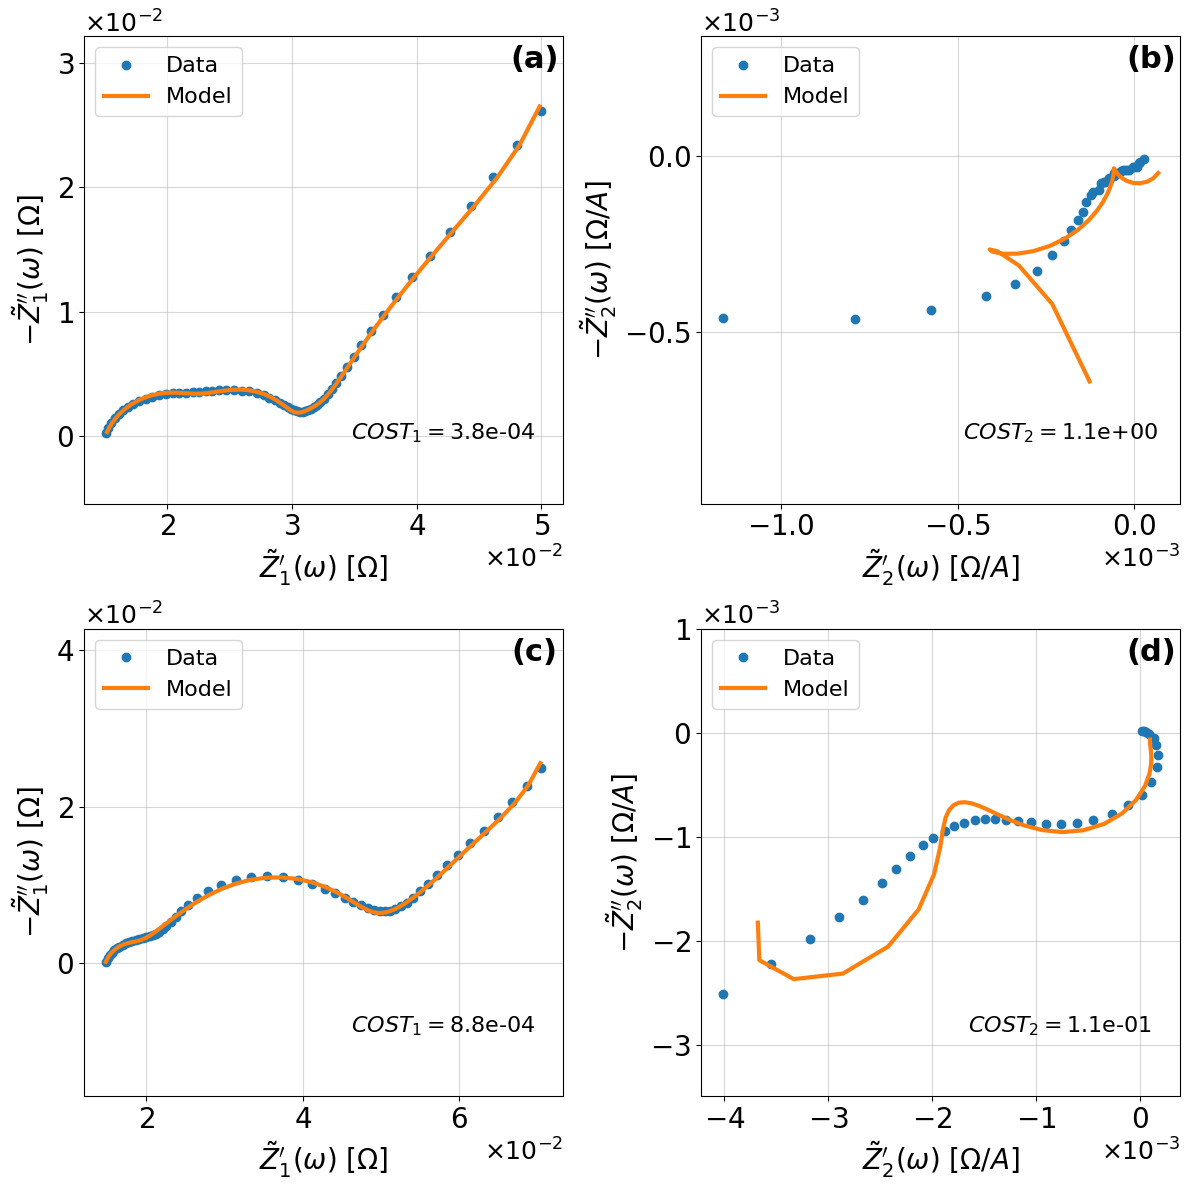

In [7]:
### formatiing plots
fig, ax = plt.subplots(2,2,figsize=(12,12))

#### fresh cell plot
plot_first(ax[0,0],Z1_10f, fmt='o',lw=3)
plot_first(ax[0,0],Z1_fit_10f, fmt='-',lw=3)
plot_second(ax[0,1],Z2_10f, fmt='o',lw=3)
plot_second(ax[0,1],Z2_fit_10f, fmt='-',lw=3)

#### aged cell plot
plot_first(ax[1,0],Z1_10a, fmt='o',lw=3)
plot_first(ax[1,0],Z1_fit_10a, fmt='-',lw=3)
plot_second(ax[1,1],Z2_10a, fmt='o',lw=3)
plot_second(ax[1,1],Z2_fit_10a, fmt='-',lw=3)

ax[0,0].legend(['Data','Model'],fontsize=16,loc='upper left')
ax[0,1].legend(['Data','Model'],fontsize=16,loc='upper left')
ax[1,0].legend(['Data','Model'],fontsize=16,loc='upper left')
ax[1,1].legend(['Data','Model'],fontsize=16,loc='upper left')

ax[0,0].text(0.75, 0.15, '$COST_{1} = $'+'{:0.1e}'.format(cost_seq(Z1_10f,Z1_fit_10f)), horizontalalignment='center',verticalalignment='center', transform=ax[0,0].transAxes,size=16)
ax[0,0].text(0.94, 0.95, '(a)',horizontalalignment='center',verticalalignment='center', transform=ax[0,0].transAxes, size=22, weight='bold')

ax[0,1].text(0.75, 0.15, '$COST_{2} = $'+'{:0.1e}'.format(cost_seq(Z2_10f,Z2_fit_10f)), horizontalalignment='center',verticalalignment='center', transform=ax[0,1].transAxes,size=16)
ax[0,1].text(0.94, 0.95, '(b)',horizontalalignment='center',verticalalignment='center', transform=ax[0,1].transAxes, size=22, weight='bold')

ax[1,0].text(0.75, 0.15, '$COST_{1} = $'+'{:0.1e}'.format(cost_seq(Z1_10a,Z1_fit_10a)), horizontalalignment='center',verticalalignment='center', transform=ax[1,0].transAxes,size=16)
ax[1,0].text(0.94, 0.95, '(c)',horizontalalignment='center',verticalalignment='center', transform=ax[1,0].transAxes, size=22, weight='bold')

ax[1,1].text(0.75, 0.15, '$COST_{2} = $'+'{:0.1e}'.format(cost_seq(Z2_10a,Z2_fit_10a)), horizontalalignment='center',verticalalignment='center', transform=ax[1,1].transAxes,size=16)
ax[1,1].text(0.94, 0.95, '(d)',horizontalalignment='center',verticalalignment='center', transform=ax[1,1].transAxes, size=22, weight='bold')


plt.tight_layout()
plt.show()

In [8]:
## data
print(tabulate([],headers=['10% SoC fresh fit parameters']))
header=['L0','R0','Rpore,c','Rct,c','Cdl,c','Ac','τc','Rpore,a','Rct,a','Cdl,a','Aa','τa']
print(tabulate([circuit_1_10f.parameters_],headers=header))
header=['κc','εc','κa','εa']
print(tabulate([circuit_2_10f.parameters_],headers=header))
## confidence interval
print(tabulate([]))
print(tabulate([],headers=['10%SoC fresh fit confidence interval']))
header=['L0','R0','Rpore,c','Rct,c','Cdl,c','Ac','τc','Rpore,a','Rct,a','Cdl,a','Aa','τa']
print(tabulate([circuit_1_10f.conf_],headers=header))
header=['κc','εc','κa','εa']
print(tabulate([circuit_2_10f.conf_],headers=header))

10% SoC fresh fit parameters
------------------------------
         L0         R0    Rpore,c       Rct,c    Cdl,c         Ac       τc    Rpore,a        Rct,a    Cdl,a           Aa      τa
-----------  ---------  ---------  ----------  -------  ---------  -------  ---------  -----------  -------  -----------  ------
5.29479e-08  0.0136938  0.0390175  0.00216298  8.12093  0.0374243  766.443   0.054333  0.000782975  1.16906  0.000992984  4.5309
      κc        εc      κa        εa
--------  --------  ------  --------
-13.6441  0.137109  -8.587  0.124454

10%SoC fresh fit confidence interval
--------------------------------------
         L0           R0     Rpore,c        Rct,c    Cdl,c         Ac       τc     Rpore,a        Rct,a     Cdl,a           Aa        τa
-----------  -----------  ----------  -----------  -------  ---------  -------  ----------  -----------  --------  -----------  --------
3.82024e-09  6.26946e-05  0.00901294  0.000497098  1.90564  0.0236497  653.434  0.00539342 

In [9]:
## data
print(tabulate([],headers=['10% SoC aged fit parameters']))
header=['L0','R0','Rpore,c','Rct,c','Cdl,c','Ac','τc','Rpore,a','Rct,a','Cdl,a','Aa','τa']
print(tabulate([circuit_1_10a.parameters_],headers=header))
header=['κc','εc','κa','εa']
print(tabulate([circuit_2_10a.parameters_],headers=header))
## confidence interval
print(tabulate([]))
print(tabulate([],headers=['10%SoC aged fit confidence interval']))
header=['L0','R0','Rpore,c','Rct,c','Cdl,c','Ac','τc','Rpore,a','Rct,a','Cdl,a','Aa','τa']
print(tabulate([circuit_1_10a.conf_],headers=header))
header=['κc','εc','κa','εa']
print(tabulate([circuit_2_10a.conf_],headers=header))

10% SoC aged fit parameters
-----------------------------
         L0         R0    Rpore,c       Rct,c    Cdl,c         Ac       τc    Rpore,a        Rct,a     Cdl,a         Aa       τa
-----------  ---------  ---------  ----------  -------  ---------  -------  ---------  -----------  --------  ---------  -------
1.08232e-07  0.0131869  0.0797881  0.00939426  15.1602  0.0337708  773.809  0.0191502  0.000968822  0.621723  0.0485747  237.381
     κc        εc       κa    εa
-------  --------  -------  ----
109.501  0.101736  52.2135   0.5

10%SoC aged fit confidence interval
-------------------------------------
         L0           R0    Rpore,c       Rct,c    Cdl,c         Ac       τc     Rpore,a        Rct,a     Cdl,a         Aa       τa
-----------  -----------  ---------  ----------  -------  ---------  -------  ----------  -----------  --------  ---------  -------
1.48028e-08  0.000206072  0.0149058  0.00176152  3.01116  0.0242344  456.178  0.00490822  0.000237037  0.152114  0.01

In [10]:
# fig.savefig('figures/Figure1.png',dpi=300,bbox_inches='tight')

# Figure 2. Sequential Optimization for 30% SoC fresh and aged cell

In [11]:
f1_30f,Z1_30f,f2_30f,Z2_30f,Z2_30f_sd = data_processing(frequencies_30f,Z1s_30f[1],Z2s_30f[1])
f1_30a,Z1_30a,f2_30a,Z2_30a,Z2_30a_sd = data_processing(frequencies_30f,Z1s_30a[1],Z2s_30a[1])

############################### EIS
#### 30% fresh Z1

initial_guess_1 = [1e-7,1e-3 ## inductor and resistor 
                   ,5e-3,1e-3,10,1e-2,100 ## cathode
                   ,1e-3,1e-3,1e-3,1e-2,100 ## anode
                   ]

initial_guess_2 = [-10,0 ## cathode
                   ,0,0] ## anode
sigma_1_30f = np.ones(len(Z1_30f)*2)*max(abs(Z1_30f))

circuit_1_30f = NLEISCustomCircuit(circ_str_1,initial_guess=initial_guess_1)
circuit_1_30f.fit(f1_30f,Z1_30f,sigma=sigma_1_30f);
Z1_fit_30f = circuit_1_30f.predict(f1_30f)

#### 10% fresh Z2

const_30f= seq_fit_parm(circuit_1_30f.extract(),['TDS0','TDP1'],['TDSn0','TDPn1'])

sigma_2_30f = np.ones(len(Z2_30f)*2)*max(abs(Z2_30f))

circuit_2_30f = NLEISCustomCircuit(circ_str_2,initial_guess=initial_guess_2,constants=const_30f)
circuit_2_30f.fit(f2_30f,Z2_30f,sigma=sigma_2_30f);
Z2_fit_30f = circuit_2_30f.predict(f2_30f)

#### 30% aged Z1

initial_guess_1 = [1e-7,1e-3 ## inductor and resistor 
                   ,5e-3,1e-3,10,1e-2,1000 ## cathode
                   ,1e-3,1e-3,1e-3,1e-2,100 ## anode
                   ]
initial_guess_2 = [-10,0.1 ## cathode
                   ,0,0] ## anode

sigma_1_30a = np.ones(len(Z1_30a)*2)*max(abs(Z1_30a))
circuit_1_30a = NLEISCustomCircuit(circ_str_1,initial_guess=initial_guess_1)
circuit_1_30a.fit(f1_30a,Z1_30a,sigma=sigma_1_30a);
Z1_fit_30a = circuit_1_30a.predict(f1_30a)

#### 30% aged Z2

const_30a= seq_fit_parm(circuit_1_30a.extract(),['TDS0','TDP1'],['TDSn0','TDPn1'])
sigma_2_30a = np.ones(len(Z2_30a)*2)*max(abs(Z2_30a))
circuit_2_30a = NLEISCustomCircuit(circ_str_2,initial_guess=initial_guess_2,constants=const_30a)
circuit_2_30a.fit(f2_30a,Z2_30a,sigma=sigma_2_30a);
Z2_fit_30a = circuit_2_30a.predict(f2_30a)

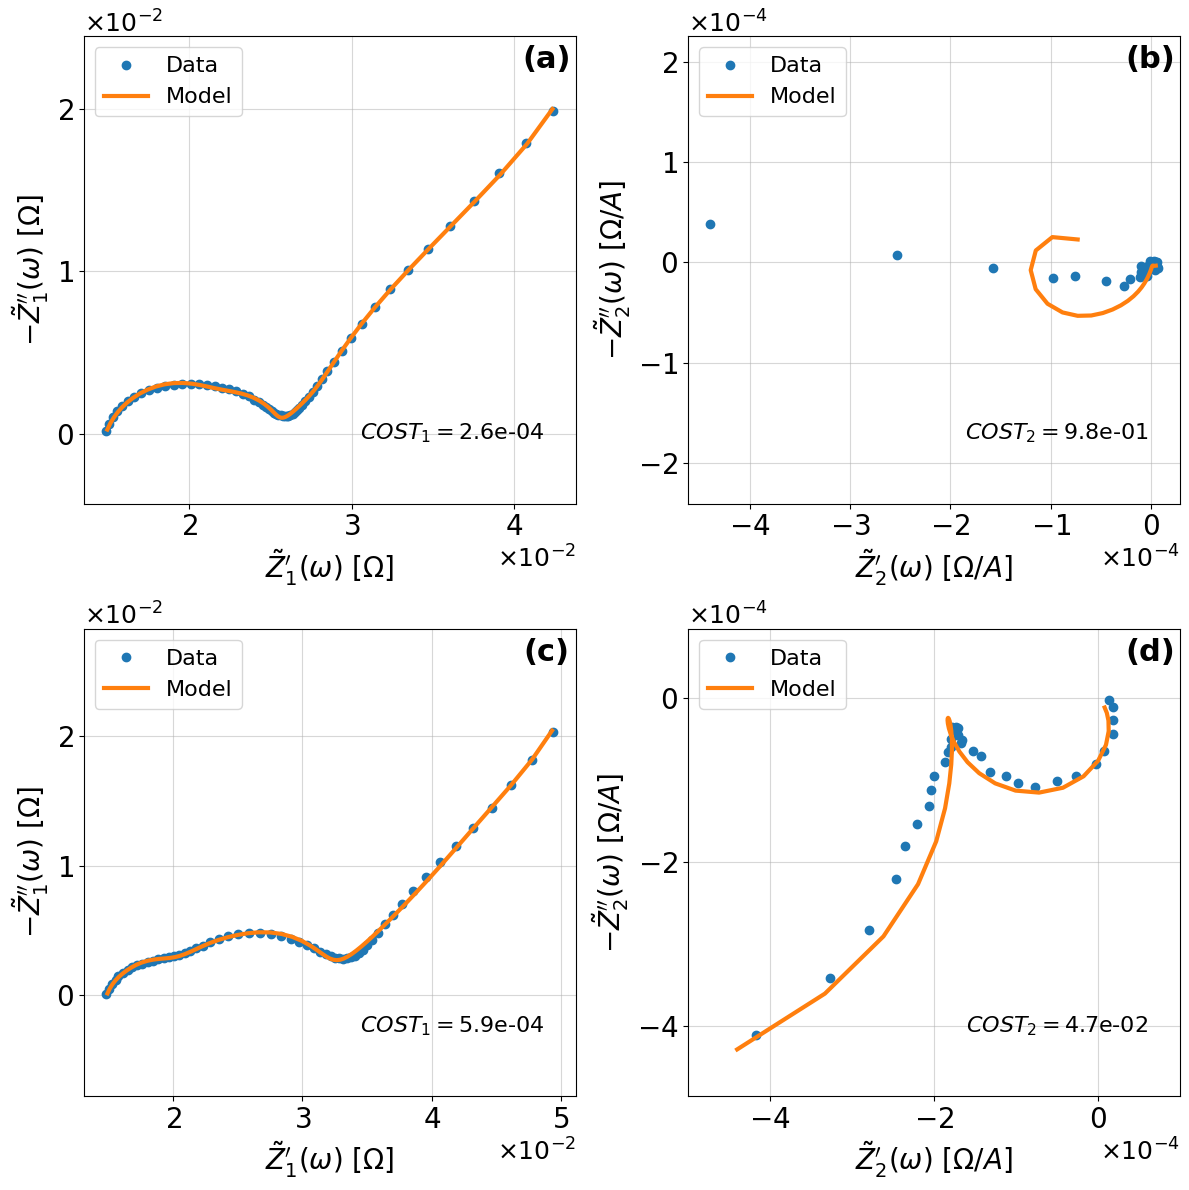

In [12]:
fig, ax = plt.subplots(2,2,figsize=(12,12))
#### fresh cell plot
plot_first(ax[0,0],Z1_30f, fmt='o',lw=3)
plot_first(ax[0,0],Z1_fit_30f, fmt='-',lw=3)
plot_second(ax[0,1],Z2_30f, fmt='o',lw=3)
plot_second(ax[0,1],Z2_fit_30f, fmt='-',lw=3)

#### aged cell plot
plot_first(ax[1,0],Z1_30a, fmt='o',lw=3)
plot_first(ax[1,0],Z1_fit_30a, fmt='-',lw=3)
plot_second(ax[1,1],Z2_30a, fmt='o',lw=3)
plot_second(ax[1,1],Z2_fit_30a, fmt='-',lw=3)

ax[0,0].legend(['Data','Model'],fontsize=16,loc='upper left')
ax[0,1].legend(['Data','Model'],fontsize=16,loc='upper left')
ax[1,0].legend(['Data','Model'],fontsize=16,loc='upper left')
ax[1,1].legend(['Data','Model'],fontsize=16,loc='upper left')

ax[0,0].text(0.75, 0.15, '$COST_{1} = $'+'{:0.1e}'.format(cost_seq(Z1_30f,Z1_fit_30f)), horizontalalignment='center',verticalalignment='center', transform=ax[0,0].transAxes,size=16)
ax[0,0].text(0.94, 0.95, '(a)',horizontalalignment='center',verticalalignment='center', transform=ax[0,0].transAxes, size=22, weight='bold')

ax[0,1].text(0.75, 0.15, '$COST_{2} = $'+'{:0.1e}'.format(cost_seq(Z2_30f,Z2_fit_30f)), horizontalalignment='center',verticalalignment='center', transform=ax[0,1].transAxes,size=16)
ax[0,1].text(0.94, 0.95, '(b)',horizontalalignment='center',verticalalignment='center', transform=ax[0,1].transAxes, size=22, weight='bold')

ax[1,0].text(0.75, 0.15, '$COST_{1} = $'+'{:0.1e}'.format(cost_seq(Z1_30a,Z1_fit_30a)), horizontalalignment='center',verticalalignment='center', transform=ax[1,0].transAxes,size=16)
ax[1,0].text(0.94, 0.95, '(c)',horizontalalignment='center',verticalalignment='center', transform=ax[1,0].transAxes, size=22, weight='bold')

ax[1,1].text(0.75, 0.15, '$COST_{2} = $'+'{:0.1e}'.format(cost_seq(Z2_30a,Z2_fit_30a)), horizontalalignment='center',verticalalignment='center', transform=ax[1,1].transAxes,size=16)
ax[1,1].text(0.94, 0.95, '(d)',horizontalalignment='center',verticalalignment='center', transform=ax[1,1].transAxes, size=22, weight='bold')
ax[1,1].set_xlim([-5e-4,1e-4])
ax[1,1].set_ylim([-5e-4,1e-4])
plt.tight_layout()
plt.show()

In [13]:
## data
print(tabulate([],headers=['30% SoC fresh fit parameters']))
header=['L0','R0','Rpore,c','Rct,c','Cdl,c','Ac','τc','Rpore,a','Rct,a','Cdl,a','Aa','τa']
print(tabulate([circuit_1_30f.parameters_],headers=header))
header=['κc','εc','κa','εa']
print(tabulate([circuit_2_30f.parameters_],headers=header))
## confidence interval
print(tabulate([]))
print(tabulate([],headers=['30%SoC fresh fit confidence interval']))
header=['L0','R0','Rpore,c','Rct,c','Cdl,c','Ac','τc','Rpore,a','Rct,a','Cdl,a','Aa','τa']
print(tabulate([circuit_1_30f.conf_],headers=header))
header=['κc','εc','κa','εa']
print(tabulate([circuit_2_30f.conf_],headers=header))

30% SoC fresh fit parameters
------------------------------
        L0         R0    Rpore,c        Rct,c    Cdl,c          Ac      τc    Rpore,a       Rct,a     Cdl,a          Aa       τa
----------  ---------  ---------  -----------  -------  ----------  ------  ---------  ----------  --------  ----------  -------
5.5874e-08  0.0135417  0.0610031  0.000445739  18.4533  0.00108902  18.106    0.03011  0.00136365  0.604477  0.00897305  142.479
     κc         εc       κa         εa
-------  ---------  -------  ---------
1.70565  0.0169227  7.75906  0.0141028

30%SoC fresh fit confidence interval
--------------------------------------
         L0           R0     Rpore,c        Rct,c    Cdl,c           Ac       τc    Rpore,a       Rct,a    Cdl,a         Aa       τa
-----------  -----------  ----------  -----------  -------  -----------  -------  ---------  ----------  -------  ---------  -------
2.67232e-09  4.63802e-05  0.00224377  2.18437e-05  1.62618  0.000564468  4.44572  0.0233306  

In [14]:
## data
print(tabulate([],headers=['30% SoC aged fit parameters']))
header=['L0','R0','Rpore,c','Rct,c','Cdl,c','Ac','τc','Rpore,a','Rct,a','Cdl,a','Aa','τa']
print(tabulate([circuit_1_30a.parameters_],headers=header))
header=['κc','εc','κa','εa']
print(tabulate([circuit_2_30a.parameters_],headers=header))
## confidence interval
print(tabulate([]))
print(tabulate([],headers=['30%SoC aged fit confidence interval']))
header=['L0','R0','Rpore,c','Rct,c','Cdl,c','Ac','τc','Rpore,a','Rct,a','Cdl,a','Aa','τa']
print(tabulate([circuit_1_30a.conf_],headers=header))
header=['κc','εc','κa','εa']
print(tabulate([circuit_2_30a.conf_],headers=header))

30% SoC aged fit parameters
-----------------------------
        L0         R0    Rpore,c      Rct,c    Cdl,c         Ac       τc     Rpore,a       Rct,a    Cdl,a         Aa       τa
----------  ---------  ---------  ---------  -------  ---------  -------  ----------  ----------  -------  ---------  -------
9.2084e-08  0.0135529  0.0242985  0.0062956  7.27432  0.0264593  593.995  0.00721716  0.00264082    0.306  0.0497863  399.185
     κc         εc       κa         εa
-------  ---------  -------  ---------
6.37184  0.0788746  3.39863  -0.008905

30%SoC aged fit confidence interval
-------------------------------------
         L0           R0     Rpore,c        Rct,c    Cdl,c         Ac       τc     Rpore,a        Rct,a      Cdl,a         Aa       τa
-----------  -----------  ----------  -----------  -------  ---------  -------  ----------  -----------  ---------  ---------  -------
7.76387e-09  9.32655e-05  0.00258132  0.000598435  1.18448  0.0247949  392.931  0.00138601  0.00026905

In [15]:
# fig.savefig('figures/Figure2.png',dpi=300,bbox_inches='tight')

# Figure 3. Sequential Optimization for 50% SoC fresh and aged cell

In [16]:
f1_50f,Z1_50f,f2_50f,Z2_50f, Z2_50f_sd = data_processing(frequencies_50f,Z1s_50f[1],Z2s_50f[1])
f1_50a,Z1_50a,f2_50a,Z2_50a, Z2_50a_sd = data_processing(frequencies_50f,Z1s_50a[1],Z2s_50a[1])

############################### EIS

initial_guess_1 = [1e-7,1e-3 ## inductor and resistor 
                   ,5e-3,1e-3,10,1e-5,1000 ## cathode
                   ,1e-3,1e-3,1e-3,1e-5,10 ## anode
                   ]
initial_guess_2 = [-10,0 ## cathode
                   ,0,0] ## anode
#### 50% fresh Z1
sigma_1_50f = np.ones(len(Z1_50f)*2)*max(abs(Z1_50f))

circuit_1_50f = NLEISCustomCircuit(circ_str_1,initial_guess=initial_guess_1)
circuit_1_50f.fit(f1_50f,Z1_50f,sigma=sigma_1_50f);
Z1_fit_50f = circuit_1_50f.predict(f1_50f)

#### 10% fresh Z2

const_50f= seq_fit_parm(circuit_1_50f.extract(),['TDS0','TDP1'],['TDSn0','TDPn1'])

sigma_2_50f = np.ones(len(Z2_50f)*2)*max(abs(Z2_50f))

circuit_2_50f = NLEISCustomCircuit(circ_str_2,initial_guess=initial_guess_2,constants=const_50f)
circuit_2_50f.fit(f2_50f,Z2_50f,sigma=sigma_2_50f);
Z2_fit_50f = circuit_2_50f.predict(f2_50f)

#### 30% aged Z1
initial_guess_1 = [1e-7,1e-3 ## inductor and resistor 
                   ,5e-3,1e-3,10,1e-5,1000 ## cathode
                   ,1e-3,2e-3,1e-3,1e-5,10 ## anode
                   ]
sigma_1_50a = np.ones(len(Z1_50a)*2)*max(abs(Z1_50a))
circuit_1_50a = NLEISCustomCircuit(circ_str_1,initial_guess=initial_guess_1)
circuit_1_50a.fit(f1_50a,Z1_50a,sigma=sigma_1_50a);
Z1_fit_50a = circuit_1_50a.predict(f1_50a)

#### 30% aged Z2

const_50a= seq_fit_parm(circuit_1_50a.extract(),['TDS0','TDP1'],['TDSn0','TDPn1'])

sigma_2_50a = np.ones(len(Z2_50a)*2)*max(abs(Z2_50a))
circuit_2_50a = NLEISCustomCircuit(circ_str_2,initial_guess=initial_guess_2,constants=const_50a)
circuit_2_50a.fit(f2_50a,Z2_50a,sigma=sigma_2_50a);
Z2_fit_50a = circuit_2_50a.predict(f2_50a)

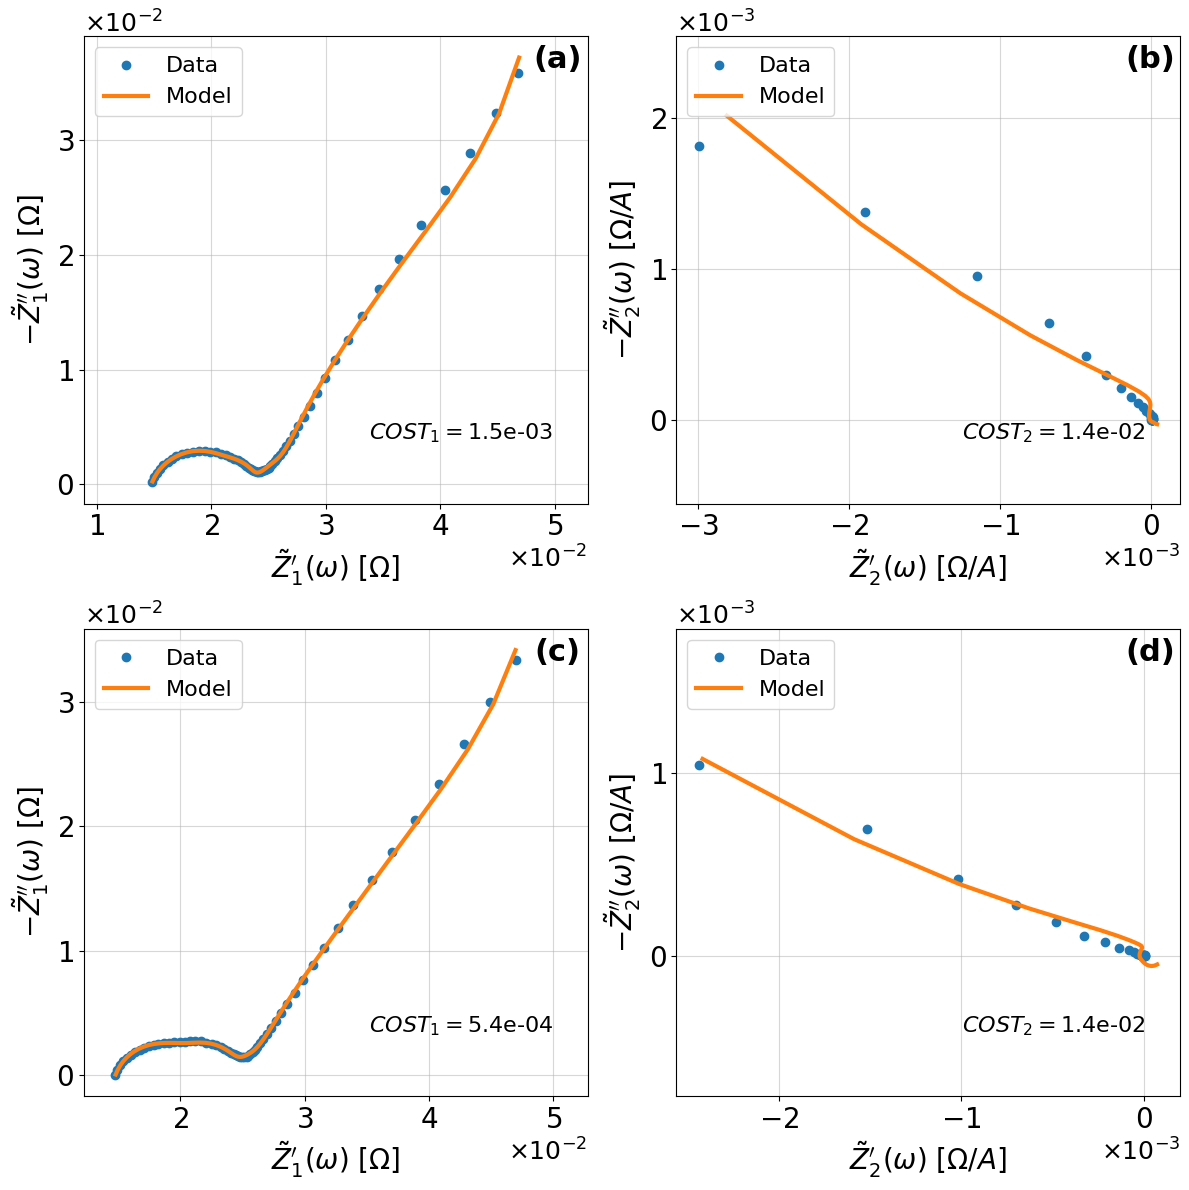

In [17]:
#### formatting plots
fig, ax = plt.subplots(2,2,figsize=(12,12))
#### fresh cell plot
plot_first(ax[0,0],Z1_50f, fmt='o',lw=3)
plot_first(ax[0,0],Z1_fit_50f, fmt='-',lw=3)
plot_second(ax[0,1],Z2_50f, fmt='o',lw=3)
plot_second(ax[0,1],Z2_fit_50f, fmt='-',lw=3)

#### aged cell plot
plot_first(ax[1,0],Z1_50a, fmt='o',lw=3)
plot_first(ax[1,0],Z1_fit_50a, fmt='-',lw=3)
plot_second(ax[1,1],Z2_50a, fmt='o',lw=3)
plot_second(ax[1,1],Z2_fit_50a, fmt='-',lw=3)

ax[0,0].legend(['Data','Model'],fontsize=16,loc='upper left')
ax[0,1].legend(['Data','Model'],fontsize=16,loc='upper left')
ax[1,0].legend(['Data','Model'],fontsize=16,loc='upper left')
ax[1,1].legend(['Data','Model'],fontsize=16,loc='upper left')

ax[0,0].text(0.75, 0.15, '$COST_{1} = $'+'{:0.1e}'.format(cost_seq(Z1_50f,Z1_fit_50f)), horizontalalignment='center',verticalalignment='center', transform=ax[0,0].transAxes,size=16)
ax[0,0].text(0.94, 0.95, '(a)',horizontalalignment='center',verticalalignment='center', transform=ax[0,0].transAxes, size=22, weight='bold')

ax[0,1].text(0.75, 0.15, '$COST_{2} = $'+'{:0.1e}'.format(cost_seq(Z2_50f,Z2_fit_50f)), horizontalalignment='center',verticalalignment='center', transform=ax[0,1].transAxes,size=16)
ax[0,1].text(0.94, 0.95, '(b)',horizontalalignment='center',verticalalignment='center', transform=ax[0,1].transAxes, size=22, weight='bold')

ax[1,0].text(0.75, 0.15, '$COST_{1} = $'+'{:0.1e}'.format(cost_seq(Z1_50a,Z1_fit_50a)), horizontalalignment='center',verticalalignment='center', transform=ax[1,0].transAxes,size=16)
ax[1,0].text(0.94, 0.95, '(c)',horizontalalignment='center',verticalalignment='center', transform=ax[1,0].transAxes, size=22, weight='bold')
ax[1,0].set_xlim([1e-2,5.5e-2])

ax[1,1].text(0.75, 0.15, '$COST_{2} = $'+'{:0.1e}'.format(cost_seq(Z2_50a,Z2_fit_50a)), horizontalalignment='center',verticalalignment='center', transform=ax[1,1].transAxes,size=16)
ax[1,1].text(0.94, 0.95, '(d)',horizontalalignment='center',verticalalignment='center', transform=ax[1,1].transAxes, size=22, weight='bold')

plt.tight_layout()
plt.show()

In [18]:
## data
print(tabulate([],headers=['50% SoC fresh fit parameters']))
header=['L0','R0','Rpore,c','Rct,c','Cdl,c','Ac','τc','Rpore,a','Rct,a','Cdl,a','Aa','τa']
print(tabulate([circuit_1_50f.parameters_],headers=header))
header=['κc','εc','κa','εa']
print(tabulate([circuit_2_50f.parameters_],headers=header))
## confidence interval
print(tabulate([]))
print(tabulate([],headers=['50%SoC fresh fit confidence interval']))
header=['L0','R0','Rpore,c','Rct,c','Cdl,c','Ac','τc','Rpore,a','Rct,a','Cdl,a','Aa','τa']
print(tabulate([circuit_1_50f.conf_],headers=header))
header=['κc','εc','κa','εa']
print(tabulate([circuit_2_50f.conf_],headers=header))

50% SoC fresh fit parameters
------------------------------
         L0         R0      Rpore,c       Rct,c    Cdl,c         Ac       τc    Rpore,a        Rct,a    Cdl,a           Aa       τa
-----------  ---------  -----------  ----------  -------  ---------  -------  ---------  -----------  -------  -----------  -------
5.69249e-08  0.0134254  0.000963008  0.00236448  1.55088  0.0531765  571.289  0.0702599  0.000772929  1.06668  0.000995348  3.42419
     κc        εc       κa        εa
-------  --------  -------  --------
14.7722  0.245104  8.62732  0.115298

50%SoC fresh fit confidence interval
--------------------------------------
         L0           R0     Rpore,c        Rct,c     Cdl,c         Ac       τc    Rpore,a        Rct,a     Cdl,a           Aa        τa
-----------  -----------  ----------  -----------  --------  ---------  -------  ---------  -----------  --------  -----------  --------
9.04509e-09  0.000206936  0.00357039  0.000382085  0.459258  0.0285521  357.298  0

In [19]:
## data
print(tabulate([],headers=['50% SoC aged fit parameters']))
header=['L0','R0','Rpore,c','Rct,c','Cdl,c','Ac','τc','Rpore,a','Rct,a','Cdl,a','Aa','τa']
print(tabulate([circuit_1_50a.parameters_],headers=header))
header=['κc','εc','κa','εa']
print(tabulate([circuit_2_50a.parameters_],headers=header))
## confidence interval
print(tabulate([]))
print(tabulate([],headers=['50%SoC aged fit confidence interval']))
header=['L0','R0','Rpore,c','Rct,c','Cdl,c','Ac','τc','Rpore,a','Rct,a','Cdl,a','Aa','τa']
print(tabulate([circuit_1_50a.conf_],headers=header))
header=['κc','εc','κa','εa']
print(tabulate([circuit_2_50a.conf_],headers=header))

50% SoC aged fit parameters
-----------------------------
         L0         R0    Rpore,c       Rct,c    Cdl,c         Ac      τc    Rpore,a        Rct,a    Cdl,a           Aa       τa
-----------  ---------  ---------  ----------  -------  ---------  ------  ---------  -----------  -------  -----------  -------
9.58002e-08  0.0134773  0.0102328  0.00348494  2.56606  0.0628043  583.36  0.0556143  0.000318324  2.79034  0.000399625  2.16818
     κc        εc       κa        εa
-------  --------  -------  --------
8.54986  0.152455  14.8313  0.419747

50%SoC aged fit confidence interval
-------------------------------------
         L0           R0     Rpore,c        Rct,c     Cdl,c         Ac       τc     Rpore,a        Rct,a     Cdl,a           Aa        τa
-----------  -----------  ----------  -----------  --------  ---------  -------  ----------  -----------  --------  -----------  --------
8.39138e-09  0.000106752  0.00147317  0.000315607  0.432568  0.0148735  117.623  0.00925198  

In [20]:
# fig.savefig('figures/Figure3.png',dpi=300,bbox_inches='tight')

# Figure 4. Simultaneous Optimization for 10% SoC fresh and aged cell

In [21]:
p1 = circuit_1_10f.parameters_
initial_guess_1 = np.hstack([p1[0:7],[-10,.1],p1[7:],[0,0]])

p2 = circuit_1_10a.parameters_
initial_guess_2 = np.hstack([p2[0:7],[10,.1],p2[7:],[0,0]])
############### bounds for NLEIS
lm = 1e2
e1 = 1e-10
e2 = 0.3
ub = np.array([1e-6,.1
               ,10,10,1000,10,10000,lm,e2
               ,.1,.1,10,10,10000,lm,e1
               ])
lower_bounds = np.array([0,0,0,0,0,0,0,-lm,-e2,0,0,0,0,0,-lm,-e1])
upper_bounds = np.ones(16)*ub
bounds = ((lower_bounds), (upper_bounds))
########
## 10% SoC fresh cell
circuit_10f = EISandNLEIS(circ_str_1,circ_str_2,initial_guess=initial_guess_1)
circuit_10f.fit(f1_10f,Z1_10f,Z2_10f_sd, bounds = bounds, opt='max');
Z1_10f_simul,Z2_10f_simul = circuit_10f.predict(f1_10f)

## 10% SoC aged cell
circuit_10a = EISandNLEIS(circ_str_1,circ_str_2,initial_guess=initial_guess_2)
circuit_10a.fit(f1_10a,Z1_10a,Z2_10a_sd, bounds = bounds, opt='max');
Z1_10a_simul,Z2_10a_simul = circuit_10a.predict(f1_10a)

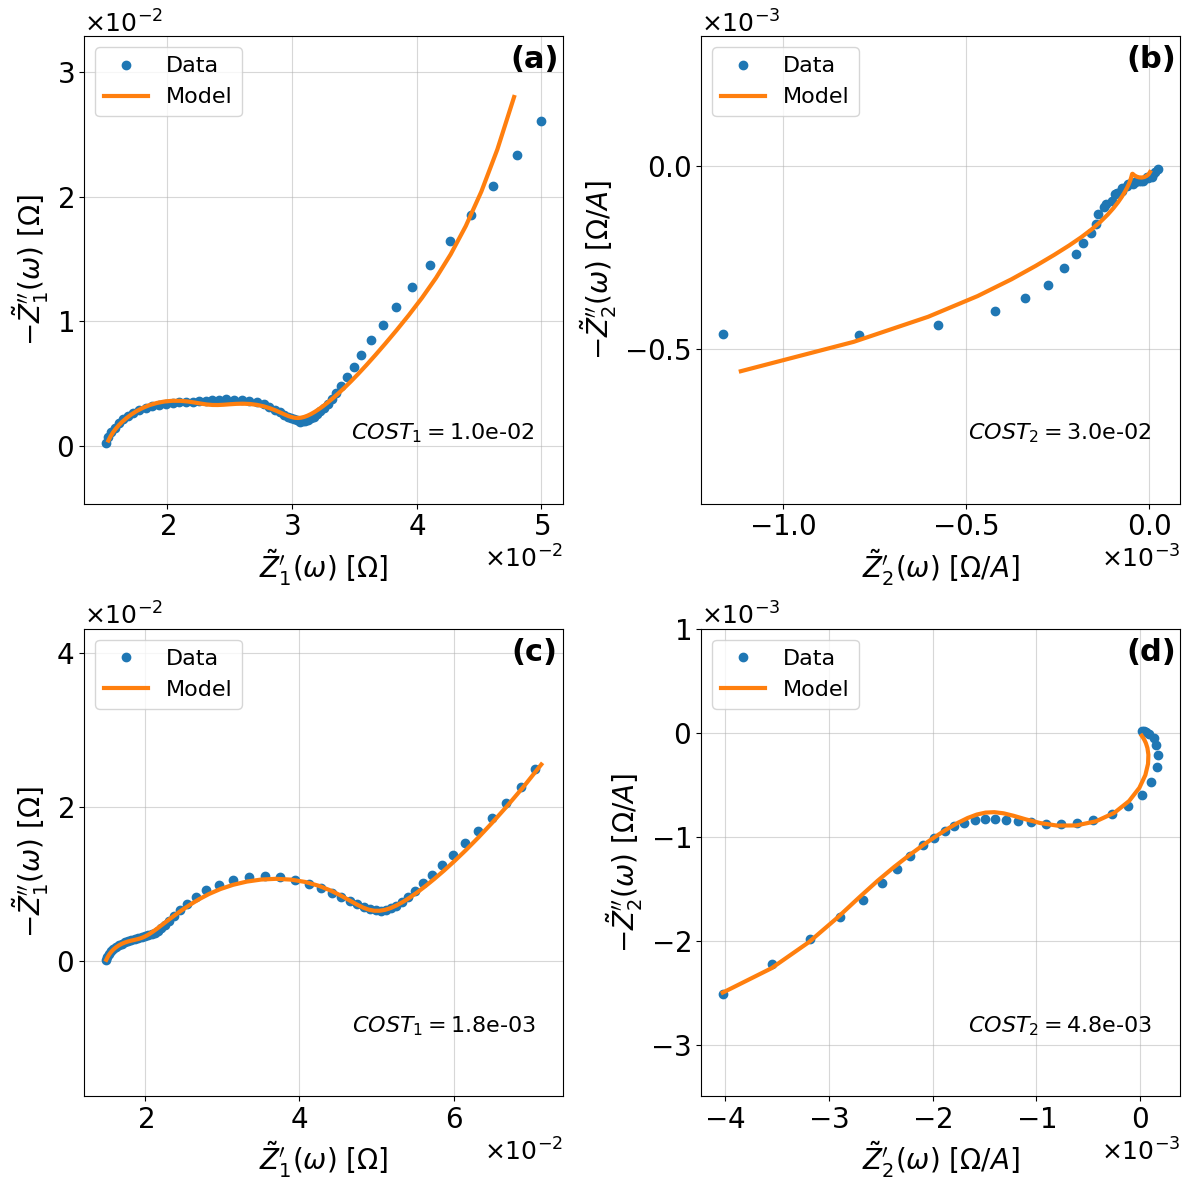

In [22]:
#### formatting plots
fig, ax = plt.subplots(2,2,figsize=(12,12))
#### fresh cell plot
plot_first(ax[0,0],Z1_10f, fmt='o',lw=3)
plot_first(ax[0,0],Z1_10f_simul, fmt='-',lw=3)
plot_second(ax[0,1],Z2_10f, fmt='o',lw=3)
plot_second(ax[0,1],Z2_10f_simul, fmt='-',lw=3)

# #### aged cell plot
plot_first(ax[1,0],Z1_10a, fmt='o',lw=3)
plot_first(ax[1,0],Z1_10a_simul, fmt='-',lw=3)
plot_second(ax[1,1],Z2_10a, fmt='o',lw=3)
plot_second(ax[1,1],Z2_10a_simul, fmt='-',lw=3)

ax[0,0].legend(['Data','Model'],fontsize=16,loc='upper left')
ax[0,1].legend(['Data','Model'],fontsize=16,loc='upper left')
ax[1,0].legend(['Data','Model'],fontsize=16,loc='upper left')
ax[1,1].legend(['Data','Model'],fontsize=16,loc='upper left')

ax[0,0].text(0.75, 0.15, '$COST_{1} = $'+'{:0.1e}'.format(cost_seq(Z1_10f,Z1_10f_simul)), horizontalalignment='center',verticalalignment='center', transform=ax[0,0].transAxes,size=16)
ax[0,0].text(0.94, 0.95, '(a)',horizontalalignment='center',verticalalignment='center', transform=ax[0,0].transAxes, size=22, weight='bold')

ax[0,1].text(0.75, 0.15, '$COST_{2} = $'+'{:0.1e}'.format(cost_seq(Z2_10f,Z2_10f_simul)), horizontalalignment='center',verticalalignment='center', transform=ax[0,1].transAxes,size=16)
ax[0,1].text(0.94, 0.95, '(b)',horizontalalignment='center',verticalalignment='center', transform=ax[0,1].transAxes, size=22, weight='bold')

ax[1,0].text(0.75, 0.15, '$COST_{1} = $'+'{:0.1e}'.format(cost_seq(Z1_10a,Z1_10a_simul)), horizontalalignment='center',verticalalignment='center', transform=ax[1,0].transAxes,size=16)
ax[1,0].text(0.94, 0.95, '(c)',horizontalalignment='center',verticalalignment='center', transform=ax[1,0].transAxes, size=22, weight='bold')

ax[1,1].text(0.75, 0.15, '$COST_{2} = $'+'{:0.1e}'.format(cost_seq(Z2_10a,Z2_10a_simul)), horizontalalignment='center',verticalalignment='center', transform=ax[1,1].transAxes,size=16)
ax[1,1].text(0.94, 0.95, '(d)',horizontalalignment='center',verticalalignment='center', transform=ax[1,1].transAxes, size=22, weight='bold')

plt.tight_layout()
plt.show()

In [23]:
print(tabulate([],headers=['10% Fresh parameters']))
header=['L0','R0','Rpore,c','Rct,c','Cdl,c','Ac','τc','κc','εc']
print(tabulate([circuit_10f.parameters_[0:9]],headers=header))
header=['Rpore,a','Rct,a','Cdl,a','Aa','τa','κa','εa']
print(tabulate([circuit_10f.parameters_[9:]],headers=header))

print(tabulate([]))
print(tabulate([],headers=['10% Fresh confidence intervals']))
header=['L0','R0','Rpore,c','Rct,c','Cdl,c','Ac','τc','κc','εc']
print(tabulate([circuit_10f.conf_[0:9]],headers=header))
header=['Rpore,a','Rct,a','Cdl,a','Aa','τa','κa','εa']
print(tabulate([circuit_10f.conf_[9:]],headers=header))

10% Fresh parameters
----------------------
         L0         R0    Rpore,c        Rct,c    Cdl,c         Ac      τc        κc        εc
-----------  ---------  ---------  -----------  -------  ---------  ------  --------  --------
4.40491e-08  0.0139055   0.107564  0.000605636  36.7933  0.0798872  9166.2  -3.38372  0.091577
  Rpore,a     Rct,a     Cdl,a           Aa        τa        κa            εa
---------  --------  --------  -----------  --------  --------  ------------
0.0197462  0.002709  0.445493  0.000166424  0.480046  -2.34943  -9.97491e-11

10% Fresh confidence intervals
--------------------------------
         L0           R0    Rpore,c      Rct,c    Cdl,c        Ac       τc        κc         εc
-----------  -----------  ---------  ---------  -------  --------  -------  --------  ---------
2.93919e-08  0.000436342   0.438429  0.0024917  151.548  0.213545  35472.6  0.615006  0.0264574
   Rpore,a        Rct,a     Cdl,a          Aa       τa       κa           εa
----------

In [24]:
print(tabulate([],headers=['10% Aged parameters']))
header=['L0','R0','Rpore,c','Rct,c','Cdl,c','Ac','τc','κc','εc']
print(tabulate([circuit_10a.parameters_[0:9]],headers=header))
header=['Rpore,a','Rct,a','Cdl,a','Aa','τa','κa','εa']
print(tabulate([circuit_10a.parameters_[9:]],headers=header))

print(tabulate([],headers=['10% Aged confidence intervals']))
header=['L0','R0','Rpore,c','Rct,c','Cdl,c','Ac','τc','κc','εc']
print(tabulate([circuit_10a.conf_[0:9]],headers=header))
header=['Rpore,a','Rct,a','Cdl,a','Aa','τa','κa','εa']
print(tabulate([circuit_10a.conf_[9:]],headers=header))

10% Aged parameters
---------------------
         L0         R0    Rpore,c      Rct,c    Cdl,c        Ac       τc       κc        εc
-----------  ---------  ---------  ---------  -------  --------  -------  -------  --------
9.12944e-08  0.0135095   0.063418  0.0124233  10.9961  0.112241  1523.14  5.69244  0.110544
  Rpore,a        Rct,a    Cdl,a         Aa       τa       κa           εa
---------  -----------  -------  ---------  -------  -------  -----------
0.0244923  0.000648371  1.13977  0.0231788  534.286  97.8713  3.81592e-19
10% Aged confidence intervals
-------------------------------
         L0           R0     Rpore,c        Rct,c     Cdl,c         Ac     τc      κc         εc
-----------  -----------  ----------  -----------  --------  ---------  -----  ------  ---------
2.99634e-08  0.000382266  0.00386035  0.000697464  0.940397  0.0271671  523.1  0.8014  0.0046241
   Rpore,a        Rct,a     Cdl,a         Aa       τa      κa    εa
----------  -----------  --------  ----

In [25]:
# fig.savefig('figures/Figure4.png',dpi=300,bbox_inches='tight')

# Figure 5. Simultaneous Optimization for 30% SoC fresh and aged cell

In [26]:
p1 = circuit_1_30f.parameters_
initial_guess_1 = np.hstack([p1[0:7],[-10,0],p1[7:],[-100,0]])
p2 = circuit_1_30a.parameters_
initial_guess_2 = np.hstack([p2[0:7],[10,.05],p2[7:],[0,0]])
############### bounds for NLEIS
lm = 1e3
e1 = 1e-10
e2 = 1e-10
ub = np.array([1e-6,.1
               ,1,10,1000,10,100,lm,e2
               ,.1,.1,10,10,10000,lm,e1
               ])
lower_bounds = np.array([0,0,0,0,0,0,0,-lm,-e2,0,0,0,0,0,-lm,-e1])
upper_bounds = np.ones(16)*ub
bounds = ((lower_bounds), (upper_bounds))


########
## 30% SoC fresh cell
circuit_30f = EISandNLEIS(circ_str_1,circ_str_2,initial_guess=initial_guess_1)
circuit_30f.fit(f1_30f,Z1_30f,Z2_30f_sd, bounds = bounds, opt='max');
Z1_30f_simul,Z2_30f_simul = circuit_30f.predict(f1_30f)

## 30% SoC aged cell

lm = 1e2
e1 = 1e-10
e2 = 0.3
ub = np.array([1e-6,.1
               ,1,1,100,10,10000,lm,e2
               ,.1,.1,10,10,10000,lm,e1
               ])
lower_bounds = np.array([0,0,0,0,0,0,0,-lm,-e2,0,0,0,0,0,-lm,-e1])
upper_bounds = np.ones(16)*ub
bounds = ((lower_bounds), (upper_bounds))
circuit_30a = EISandNLEIS(circ_str_1,circ_str_2,initial_guess=initial_guess_2)
circuit_30a.fit(f1_30a,Z1_30a,Z2_30a_sd, bounds = bounds, opt='max');
Z1_30a_simul,Z2_30a_simul = circuit_30a.predict(f1_30a)

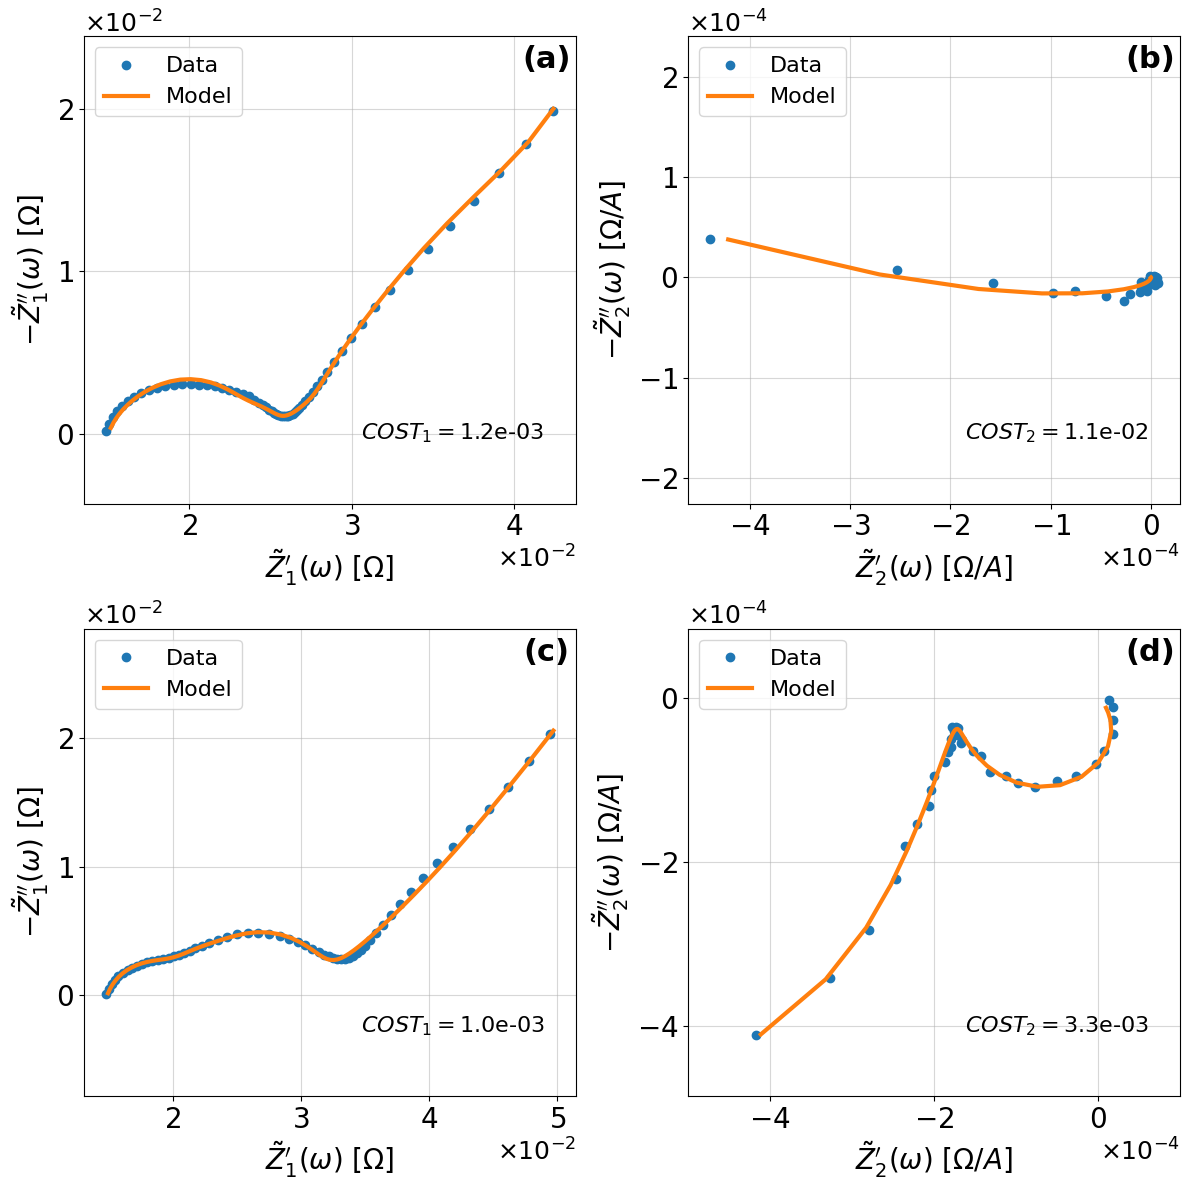

In [27]:
#### formatting plots
fig, ax = plt.subplots(2,2,figsize=(12,12))
#### fresh cell plot
plot_first(ax[0,0],Z1_30f, fmt='o',lw=3)
plot_first(ax[0,0],Z1_30f_simul, fmt='-',lw=3)
plot_second(ax[0,1],Z2_30f, fmt='o',lw=3)
plot_second(ax[0,1],Z2_30f_simul, fmt='-',lw=3)

# #### aged cell plot
plot_first(ax[1,0],Z1_30a, fmt='o',lw=3)
plot_first(ax[1,0],Z1_30a_simul, fmt='-',lw=3)
plot_second(ax[1,1],Z2_30a, fmt='o',lw=3)
plot_second(ax[1,1],Z2_30a_simul, fmt='-',lw=3)

ax[0,0].legend(['Data','Model'],fontsize=16,loc='upper left')
ax[0,1].legend(['Data','Model'],fontsize=16,loc='upper left')
ax[1,0].legend(['Data','Model'],fontsize=16,loc='upper left')
ax[1,1].legend(['Data','Model'],fontsize=16,loc='upper left')

ax[0,0].text(0.75, 0.15, '$COST_{1} = $'+'{:0.1e}'.format(cost_seq(Z1_30f,Z1_30f_simul)), horizontalalignment='center',verticalalignment='center', transform=ax[0,0].transAxes,size=16)
ax[0,0].text(0.94, 0.95, '(a)',horizontalalignment='center',verticalalignment='center', transform=ax[0,0].transAxes, size=22, weight='bold')

ax[0,1].text(0.75, 0.15, '$COST_{2} = $'+'{:0.1e}'.format(cost_seq(Z2_30f,Z2_30f_simul)), horizontalalignment='center',verticalalignment='center', transform=ax[0,1].transAxes,size=16)
ax[0,1].text(0.94, 0.95, '(b)',horizontalalignment='center',verticalalignment='center', transform=ax[0,1].transAxes, size=22, weight='bold')

ax[1,0].text(0.75, 0.15, '$COST_{1} = $'+'{:0.1e}'.format(cost_seq(Z1_30a,Z1_30a_simul)), horizontalalignment='center',verticalalignment='center', transform=ax[1,0].transAxes,size=16)
ax[1,0].text(0.94, 0.95, '(c)',horizontalalignment='center',verticalalignment='center', transform=ax[1,0].transAxes, size=22, weight='bold')

ax[1,1].text(0.75, 0.15, '$COST_{2} = $'+'{:0.1e}'.format(cost_seq(Z2_30a,Z2_30a_simul)), horizontalalignment='center',verticalalignment='center', transform=ax[1,1].transAxes,size=16)
ax[1,1].text(0.94, 0.95, '(d)',horizontalalignment='center',verticalalignment='center', transform=ax[1,1].transAxes, size=22, weight='bold')
ax[1,1].set_xlim([-5e-4,1e-4])
ax[1,1].set_ylim([-5e-4,1e-4])

plt.tight_layout()
plt.show()

In [28]:
print(tabulate([],headers=['30% Fresh parameters']))
header=['L0','R0','Rpore,c','Rct,c','Cdl,c','Ac','τc','κc','εc']
print(tabulate([circuit_30f.parameters_[0:9]],headers=header))
header=['Rpore,a','Rct,a','Cdl,a','Aa','τa','κa','εa']
print(tabulate([circuit_30f.parameters_[9:]],headers=header))

print(tabulate([]))
print(tabulate([],headers=['30% Fresh confidence intervals']))
header=['L0','R0','Rpore,c','Rct,c','Cdl,c','Ac','τc','κc','εc']
print(tabulate([circuit_30f.conf_[0:9]],headers=header))
header=['Rpore,a','Rct,a','Cdl,a','Aa','τa','κa','εa']
print(tabulate([circuit_30f.conf_[9:]],headers=header))

30% Fresh parameters
----------------------
        L0         R0    Rpore,c        Rct,c    Cdl,c          Ac      τc         κc      εc
----------  ---------  ---------  -----------  -------  ----------  ------  ---------  ------
4.1798e-08  0.0139468  0.0724936  0.000154906  85.6909  0.00141692  17.426  -0.156106  -1e-10
  Rpore,a       Rct,a     Cdl,a           Aa        τa      κa           εa
---------  ----------  --------  -----------  --------  ------  -----------
0.0448564  0.00143491  0.958662  3.32873e-06  0.505936  -379.2  9.53141e-11

30% Fresh confidence intervals
--------------------------------
         L0           R0     Rpore,c        Rct,c    Cdl,c           Ac       τc        κc          εc
-----------  -----------  ----------  -----------  -------  -----------  -------  --------  ----------
1.31545e-08  0.000192626  0.00342233  4.24962e-05  46.3799  0.000371735  4.06165  0.112314  1.5313e-17
  Rpore,a      Rct,a    Cdl,a           Aa       τa       κa           ε

In [29]:
print(tabulate([],headers=['30% Aged parameters']))
header=['L0','R0','Rpore,c','Rct,c','Cdl,c','Ac','τc','κc','εc']
print(tabulate([circuit_30a.parameters_[0:9]],headers=header))
header=['Rpore,a','Rct,a','Cdl,a','Aa','τa','κa','εa']
print(tabulate([circuit_30a.parameters_[9:]],headers=header))

print(tabulate([]))
print(tabulate([],headers=['30% Aged confidence intervals']))
header=['L0','R0','Rpore,c','Rct,c','Cdl,c','Ac','τc','κc','εc']
print(tabulate([circuit_30a.conf_[0:9]],headers=header))
header=['Rpore,a','Rct,a','Cdl,a','Aa','τa','κa','εa']
print(tabulate([circuit_30a.conf_[9:]],headers=header))

30% Aged parameters
---------------------
         L0         R0    Rpore,c       Rct,c    Cdl,c         Ac       τc      κc         εc
-----------  ---------  ---------  ----------  -------  ---------  -------  ------  ---------
8.73687e-08  0.0136579  0.0197259  0.00738495  5.08418  0.0952935  1877.87  2.3177  0.0635389
  Rpore,a       Rct,a     Cdl,a         Aa       τa       κa          εa
---------  ----------  --------  ---------  -------  -------  ----------
0.0113691  0.00161201  0.576631  0.0318494  614.767  13.0393  3.0205e-13

30% Aged confidence intervals
-------------------------------
         L0           R0      Rpore,c        Rct,c     Cdl,c        Ac       τc        κc          εc
-----------  -----------  -----------  -----------  --------  --------  -------  --------  ----------
1.66221e-08  0.000195869  0.000875288  0.000210757  0.239124  0.013589  399.873  0.269271  0.00251701
    Rpore,a        Rct,a      Cdl,a         Aa       τa       κa           εa
----------

In [30]:
# fig.savefig('figures/Figure5.png',dpi=300,bbox_inches='tight')

# Figure 6. Simultaneous Optimization for 50% SoC fresh and aged cell

In [31]:
p1 = circuit_1_50f.parameters_
initial_guess_1 = np.hstack([p1[0:7],[-1,0],p1[7:],[0,0]])
p2 = circuit_1_50a.parameters_
initial_guess_2 = np.hstack([p2[0:7],[10,0],p2[7:],[0,0]])
############### bounds for NLEIS
lm = 1e3
e1 = 1e-10
e2 = 1e-10
ub = np.array([1e-6,.1
               ,1,1,100,10,10000,lm,e2
               ,.1,.1,10,10,10000,lm,e1
               ])
lower_bounds = np.array([0,0,0,0,0,0,0,-lm,-e2,0,0,0,0,0,-lm,-e1])
upper_bounds = np.ones(16)*ub
bounds = ((lower_bounds), (upper_bounds))
########
## 50% SoC fresh cell
circuit_50f = EISandNLEIS(circ_str_1,circ_str_2,initial_guess=initial_guess_1)
circuit_50f.fit(f1_50f,Z1_50f,Z2_50f_sd, bounds = bounds, opt='max');
Z1_50f_simul,Z2_50f_simul = circuit_50f.predict(f1_50f)

## 30% SoC aged cell

lm = 1e2
e1 = 1e-10
e2 = 1e-10
ub = np.array([1e-6,.1
               ,1,1,100,10,10000,lm,e2
               ,.1,.1,10,10,10000,lm,e1
               ])
lower_bounds = np.array([0,0,0,0,0,0,0,-lm,-e2,0,0,0,0,0,-lm,-e1])
upper_bounds = np.ones(16)*ub
bounds = ((lower_bounds), (upper_bounds))
circuit_50a = EISandNLEIS(circ_str_1,circ_str_2,initial_guess=initial_guess_2)
circuit_50a.fit(f1_50a,Z1_50a,Z2_50a_sd, bounds = bounds, opt='max');
Z1_50a_simul,Z2_50a_simul = circuit_50a.predict(f1_50a)

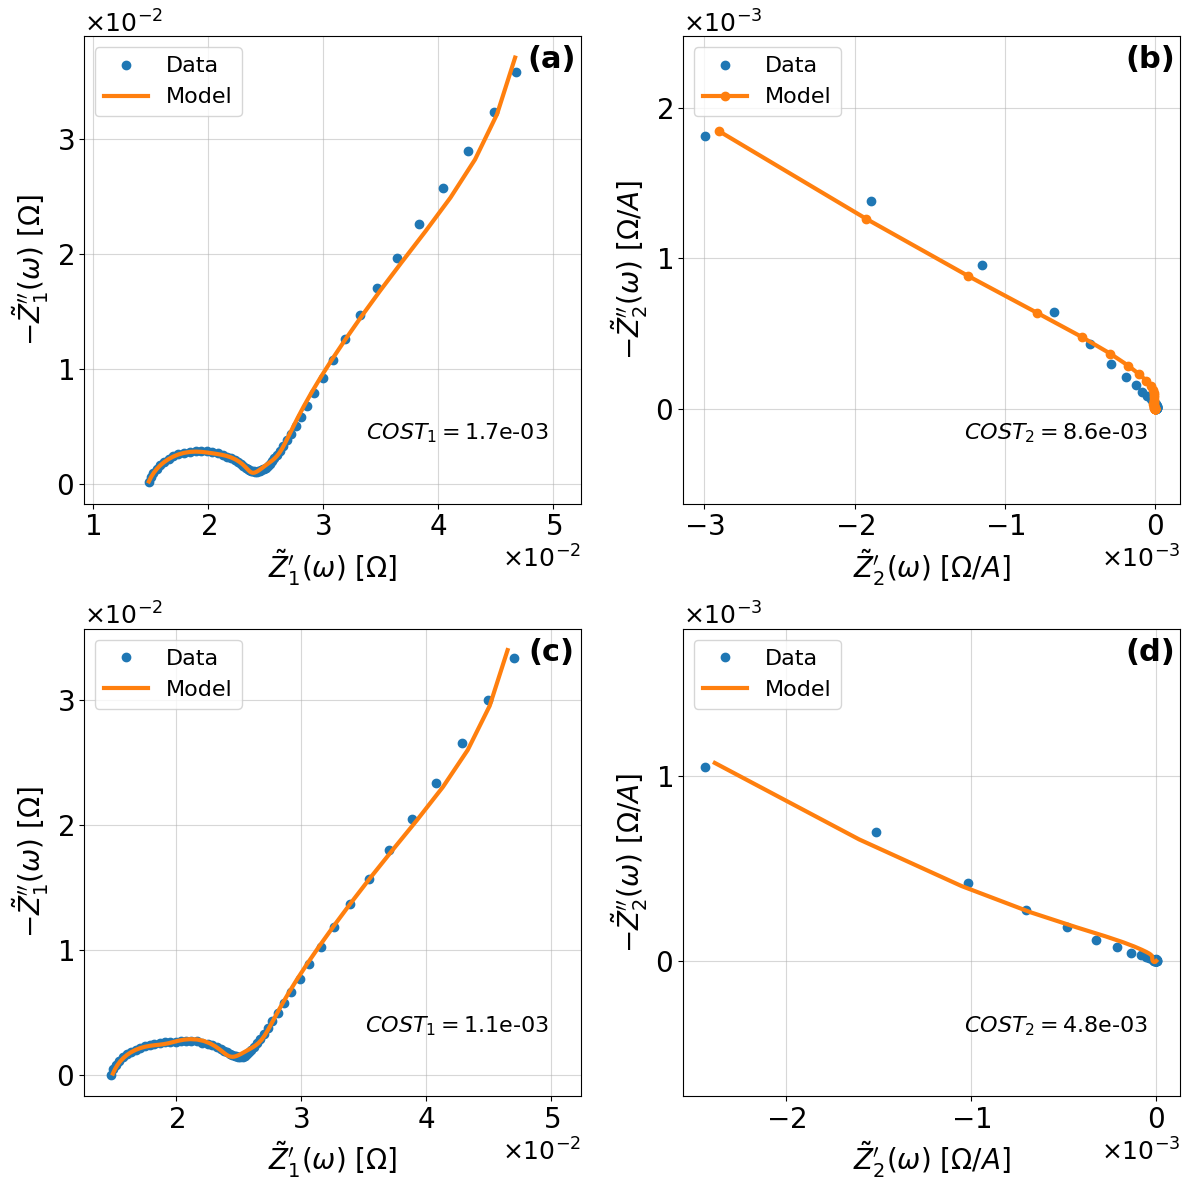

In [32]:
#### formatting plots
fig, ax = plt.subplots(2,2,figsize=(12,12))
#### fresh cell plot
plot_first(ax[0,0],Z1_50f, fmt='o',lw=3)
plot_first(ax[0,0],Z1_50f_simul, fmt='-',lw=3)
plot_second(ax[0,1],Z2_50f, fmt='o',lw=3)
plot_second(ax[0,1],Z2_50f_simul, fmt='-o',lw=3)

# #### aged cell plot
plot_first(ax[1,0],Z1_50a, fmt='o',lw=3)
plot_first(ax[1,0],Z1_50a_simul, fmt='-',lw=3)
plot_second(ax[1,1],Z2_50a, fmt='o',lw=3)
plot_second(ax[1,1],Z2_50a_simul, fmt='-',lw=3)

ax[0,0].legend(['Data','Model'],fontsize=16,loc='upper left')
ax[0,1].legend(['Data','Model'],fontsize=16,loc='upper left')
ax[1,0].legend(['Data','Model'],fontsize=16,loc='upper left')
ax[1,1].legend(['Data','Model'],fontsize=16,loc='upper left')

ax[0,0].text(0.75, 0.15, '$COST_{1} = $'+'{:0.1e}'.format(cost_seq(Z1_50f,Z1_50f_simul)), horizontalalignment='center',verticalalignment='center', transform=ax[0,0].transAxes,size=16)
ax[0,0].text(0.94, 0.95, '(a)',horizontalalignment='center',verticalalignment='center', transform=ax[0,0].transAxes, size=22, weight='bold')

ax[0,1].text(0.75, 0.15, '$COST_{2} = $'+'{:0.1e}'.format(cost_seq(Z2_50f,Z2_50f_simul)), horizontalalignment='center',verticalalignment='center', transform=ax[0,1].transAxes,size=16)
ax[0,1].text(0.94, 0.95, '(b)',horizontalalignment='center',verticalalignment='center', transform=ax[0,1].transAxes, size=22, weight='bold')

ax[1,0].text(0.75, 0.15, '$COST_{1} = $'+'{:0.1e}'.format(cost_seq(Z1_50a,Z1_50a_simul)), horizontalalignment='center',verticalalignment='center', transform=ax[1,0].transAxes,size=16)
ax[1,0].text(0.94, 0.95, '(c)',horizontalalignment='center',verticalalignment='center', transform=ax[1,0].transAxes, size=22, weight='bold')

ax[1,1].text(0.75, 0.15, '$COST_{2} = $'+'{:0.1e}'.format(cost_seq(Z2_50a,Z2_50a_simul)), horizontalalignment='center',verticalalignment='center', transform=ax[1,1].transAxes,size=16)
ax[1,1].text(0.94, 0.95, '(d)',horizontalalignment='center',verticalalignment='center', transform=ax[1,1].transAxes, size=22, weight='bold')

ax[1,0].set_xlim([1e-2,5.5e-2])

plt.tight_layout(w_pad=2)
plt.show()

In [33]:
print(tabulate([],headers=['50% Fresh parameters']))
header=['L0','R0','Rpore,c','Rct,c','Cdl,c','Ac','τc','κc','εc']
print(tabulate([circuit_50f.parameters_[0:9]],headers=header))
header=['Rpore,a','Rct,a','Cdl,a','Aa','τa','κa','εa']
print(tabulate([circuit_50f.parameters_[9:]],headers=header))

print(tabulate([]))
print(tabulate([],headers=['50% Fresh confidence intervals']))
header=['L0','R0','Rpore,c','Rct,c','Cdl,c','Ac','τc','κc','εc']
print(tabulate([circuit_50f.conf_[0:9]],headers=header))
header=['Rpore,a','Rct,a','Cdl,a','Aa','τa','κa','εa']
print(tabulate([circuit_50f.conf_[9:]],headers=header))

50% Fresh parameters
----------------------
         L0         R0      Rpore,c      Rct,c     Cdl,c         Ac       τc       κc            εc
-----------  ---------  -----------  ---------  --------  ---------  -------  -------  ------------
5.96414e-08  0.0133302  0.000866269  0.0028982  0.956558  0.0367299  432.233  18.2056  -8.80212e-11
  Rpore,a        Rct,a    Cdl,a          Aa       τa       κa           εa
---------  -----------  -------  ----------  -------  -------  -----------
  0.07692  0.000602968  1.10331  0.00108817  3.36387  4.73103  9.99388e-11

50% Fresh confidence intervals
--------------------------------
         L0           R0     Rpore,c       Rct,c     Cdl,c          Ac       τc      κc          εc
-----------  -----------  ----------  ----------  --------  ----------  -------  ------  ----------
1.80281e-08  0.000362238  0.00312969  0.00094151  0.561872  0.00603204  28.5556  4.5529  0.00106882
   Rpore,a        Rct,a     Cdl,a           Aa        τa        κa

In [34]:
print(tabulate([],headers=['50% Aged parameters']))
header=['L0','R0','Rpore,c','Rct,c','Cdl,c','Ac','τc','κc','εc']
print(tabulate([circuit_50a.parameters_[0:9]],headers=header))
header=['Rpore,a','Rct,a','Cdl,a','Aa','τa','κa','εa']
print(tabulate([circuit_50a.parameters_[9:]],headers=header))

print(tabulate([],headers=['50% Aged confidence intervals']))
header=['L0','R0','Rpore,c','Rct,c','Cdl,c','Ac','τc','κc','εc']
print(tabulate([circuit_50a.conf_[0:9]],headers=header))
header=['Rpore,a','Rct,a','Cdl,a','Aa','τa','κa','εa']
print(tabulate([circuit_50a.conf_[9:]],headers=header))

50% Aged parameters
---------------------
         L0         R0     Rpore,c       Rct,c    Cdl,c         Ac       τc       κc            εc
-----------  ---------  ----------  ----------  -------  ---------  -------  -------  ------------
8.59969e-08  0.0136544  0.00242915  0.00425361  1.37271  0.0272549  388.379  21.5103  -3.65104e-11
  Rpore,a        Rct,a    Cdl,a          Aa       τa       κa           εa
---------  -----------  -------  ----------  -------  -------  -----------
0.0751147  0.000311071  3.12472  0.00118627  3.71435  4.37814  1.22367e-11
50% Aged confidence intervals
-------------------------------
       L0           R0     Rpore,c        Rct,c    Cdl,c          Ac       τc       κc           εc
---------  -----------  ----------  -----------  -------  ----------  -------  -------  -----------
2.142e-08  0.000266903  0.00158955  0.000338994   0.2269  0.00567965  31.3771  6.40487  1.42471e-21
   Rpore,a        Rct,a     Cdl,a           Aa        τa        κa        

In [35]:
# fig.savefig('figures/Figure6.png',dpi=300,bbox_inches='tight')

# Figure 7. Sensitivity to State of Health (SoH)

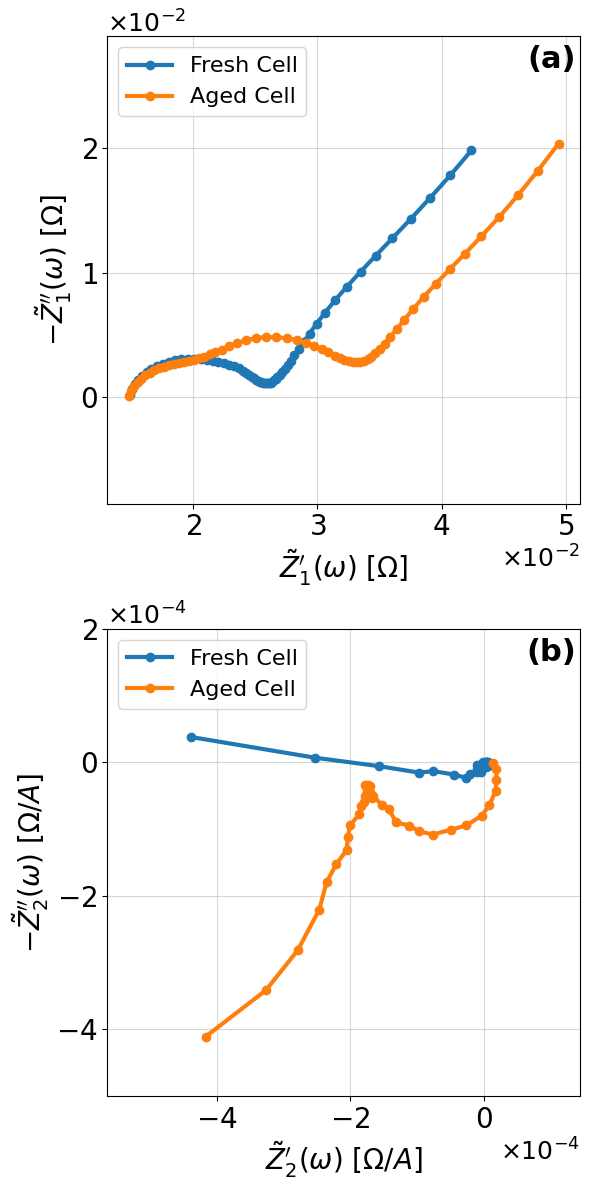

In [36]:
fig, ax = plt.subplots(2,1,figsize=(6,12))

plot_first(ax[0], Z1_30f, fmt='-o',lw=3)
plot_first(ax[0], Z1_30a, fmt='-o',lw=3)
ax[0].legend(['Fresh Cell', 'Aged Cell'],fontsize=16,loc='upper left')
ax[0].text(0.94, 0.95, '(a)',horizontalalignment='center',verticalalignment='center', transform=ax[0].transAxes, size=22, weight='bold')

plot_second(ax[1], Z2_30f, fmt='-o',lw=3)
plot_second(ax[1], Z2_30a, fmt='-o',lw=3)
ax[1].legend(['Fresh Cell', 'Aged Cell'],fontsize=16,loc='upper left')
ax[1].text(0.94, 0.95, '(b)',horizontalalignment='center',verticalalignment='center', transform=ax[1].transAxes, size=22, weight='bold')
ax[1].set_ylim([-5e-4,2e-4])

plt.tight_layout()
plt.show()

In [37]:
# fig.savefig('figures/Figure7.png',dpi=300,bbox_inches='tight')

# Figure 8. Sensitivity to State of Charge (SoC) for aged cell

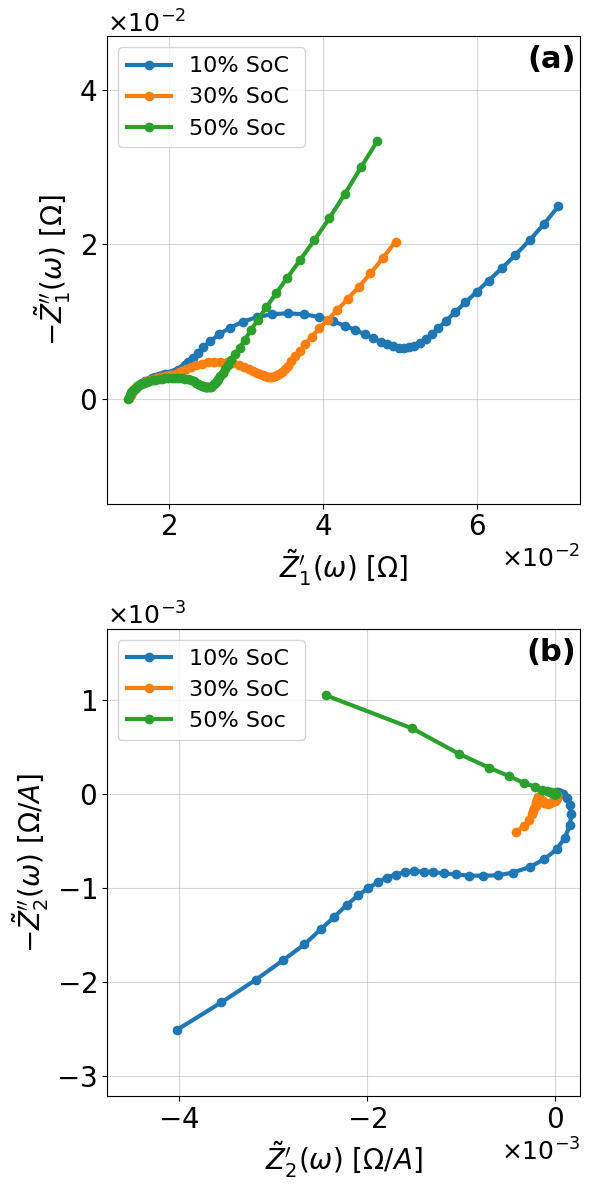

In [38]:
fig, ax = plt.subplots(2,1,figsize=(6,12))

plot_first(ax[0], Z1_10a, fmt='-o',lw=3)
plot_first(ax[0], Z1_30a, fmt='-o',lw=3)
plot_first(ax[0], Z1_50a, fmt='-o',lw=3)
ax[0].legend(['10% SoC ', '30% SoC', '50% Soc'],fontsize=16,loc='upper left')
ax[0].text(0.94, 0.95, '(a)',horizontalalignment='center',verticalalignment='center', transform=ax[0].transAxes, size=22, weight='bold')

plot_second(ax[1], Z2_10a, fmt='-o',lw=3)
plot_second(ax[1], Z2_30a, fmt='-o',lw=3)
plot_second(ax[1], Z2_50a, fmt='-o',lw=3)

ax[1].legend(['10% SoC ', '30% SoC', '50% Soc'],fontsize=16,loc='upper left')
ax[1].text(0.94, 0.95, '(b)',horizontalalignment='center',verticalalignment='center', transform=ax[1].transAxes, size=22, weight='bold')
ax[1].set_xlim([-5e-3,5e-4])
plt.tight_layout()
plt.show()

In [39]:
# fig.savefig('figures/Figure8.png',dpi=300,bbox_inches='tight')

# Figure 9. Sensitivity to Cell to Cell Variation

In [40]:
#### Fresh Cell calcualtion
f1_1cc,Z1f_1cc,f2_1cc,Z2f_1cc,Z2f_1cc_sd = data_processing(frequencies_30f,Z1s_30f[0],Z2s_30f[0])
sigma_1cc = np.ones(len(Z1f_1cc)*2)*max(abs(Z1f_1cc))

f1_2cc,Z1f_2cc,f2_2cc,Z2f_2cc,Z2f_2cc_sd = data_processing(frequencies_30f,Z1s_30f[1],Z2s_30f[1])
sigma_2cc = np.ones(len(Z1f_2cc)*2)*max(abs(Z1f_2cc))

f1_3cc,Z1f_3cc,f2_3cc,Z2f_3cc,Z2f_3cc_sd = data_processing(frequencies_30f,Z1s_30f[2],Z2s_30f[2])
sigma_3cc = np.ones(len(Z1f_3cc)*2)*max(abs(Z1f_3cc))

In [41]:
circ_str_1 = 'L0-R0-TDS0-TDP1' ## EIS string
circ_str_2 = 't(TDSn0,TDPn1)' ## NLEIS string 
initial_guess_1 = [1e-7,1e-3 ## inductor and resistor 
                   ,5e-3,1e-3,10,1e-2,100 ## cathode
                   ,1e-3,1e-3,1e-3,1e-2,100 ## anode
                   ]
circuit_1_1cc = NLEISCustomCircuit(circ_str_1,initial_guess=initial_guess_1)
circuit_1_1cc.fit(f1_1cc,Z1f_1cc,sigma=sigma_1cc)

initial_guess_2 = [1e-7,1e-3 ## inductor and resistor 
                   ,5e-3,1e-3,10,1e-2,100 ## cathode
                   ,1e-3,1e-3,1e-3,1e-2,100 ## anode
                   ]
circuit_1_2cc = NLEISCustomCircuit(circ_str_1,initial_guess=initial_guess_2)
circuit_1_2cc.fit(f1_2cc,Z1f_2cc,sigma=sigma_2cc)

initial_guess_3 = [1e-7,1e-3 ## inductor and resistor 
                   ,5e-3,1e-3,10,1e-2,100 ## cathode
                   ,1e-3,1e-3,1e-3,1e-2,100 ## anode
                   ]
circuit_1_3cc = NLEISCustomCircuit(circ_str_1,initial_guess=initial_guess_3)
circuit_1_3cc.fit(f1_3cc,Z1f_3cc,sigma=sigma_3cc)

p1_cc = circuit_1_1cc.parameters_
initial_guess_1cc = np.hstack([p1_cc[0:7],[-10,0],p1_cc[7:],[-100,0]])
p2_cc = circuit_1_2cc.parameters_
initial_guess_2cc = np.hstack([p2_cc[0:7],[-10,0],p2_cc[7:],[-100,0]])
p3_cc = circuit_1_3cc.parameters_
initial_guess_3cc = np.hstack([p3_cc[0:7],[-10,0],p3_cc[7:],[-100,0]])

############### bounds for NLEIS
lm = 1e3
e1 = 1e-10
e2 = 1e-10
ub = np.array([1e-6,.1
               ,1,10,1000,10,100,lm,e2
               ,.1,.1,10,10,10000,lm,e1
               ])
lower_bounds = np.array([0,0,0,0,0,0,0,-lm,-e2,0,0,0,0,0,-lm,-e1])
upper_bounds = np.ones(16)*ub
bounds = ((lower_bounds), (upper_bounds))
########
## Cell 1
circuit_2_1cc = EISandNLEIS(circ_str_1,circ_str_2,initial_guess=initial_guess_1cc)
circuit_2_1cc.fit(f1_1cc,Z1f_1cc,Z2f_1cc_sd, bounds = bounds, opt='max');
Z1_1cc,Z2_1cc = circuit_2_1cc.predict(f1_1cc)

## Cell 2
circuit_2_2cc = EISandNLEIS(circ_str_1,circ_str_2,initial_guess=initial_guess_2cc)
circuit_2_2cc.fit(f1_2cc,Z1f_2cc,Z2f_2cc_sd, bounds = bounds, opt='max');
Z1_2cc,Z2_2cc = circuit_2_2cc.predict(f1_2cc)

## Cell 3
circuit_2_3cc = EISandNLEIS(circ_str_1,circ_str_2,initial_guess=initial_guess_3cc)
circuit_2_3cc.fit(f1_3cc,Z1f_3cc,Z2f_3cc_sd, bounds = bounds, opt='max');
Z1_3cc,Z2_3cc = circuit_2_3cc.predict(f1_3cc)


In [42]:
#### Aged Cell calculation
f1a_1cc,Z1a_1cc,f2a_1cc,Z2a_1cc,Z2a_1cc_sd = data_processing(frequencies_30a,Z1s_30a[0],Z2s_30a[0])
sigma_a_1cc = np.ones(len(Z1a_1cc)*2)*max(abs(Z1a_1cc))

f1a_2cc,Z1a_2cc,f2a_2cc,Z2a_2cc,Z2a_2cc_sd = data_processing(frequencies_30a,Z1s_30a[1],Z2s_30a[1])
sigma_a_2cc = np.ones(len(Z1a_2cc)*2)*max(abs(Z1a_2cc))

f1a_3cc,Z1a_3cc,f2a_3cc,Z2a_3cc,Z2a_3cc_sd = data_processing(frequencies_30a,Z1s_30a[2],Z2s_30a[2])
sigma_a_3cc = np.ones(len(Z1a_3cc)*2)*max(abs(Z1a_3cc))


In [43]:
circ_str_1 = 'L0-R0-TDS0-TDP1' ## EIS string
circ_str_2 = 't(TDSn0,TDPn1)' ## NLEIS string 
initial_guess_1 = [1e-7,1e-3 ## inductor and resistor 
                   ,5e-3,1e-3,10,1e-2,1000 ## cathode
                   ,1e-3,1e-3,1e-3,1e-2,100 ## anode
                   ]
circuit_1a_1cc = NLEISCustomCircuit(circ_str_1,initial_guess=initial_guess_1)
circuit_1a_1cc.fit(f1a_1cc,Z1a_1cc,sigma=sigma_a_1cc)

initial_guess_2 = [1e-7,1e-3 ## inductor and resistor 
                   ,5e-3,1e-3,10,1e-2,1000 ## cathode
                   ,1e-3,1e-3,1e-3,1e-2,100 ## anode
                   ]
circuit_1a_2cc = NLEISCustomCircuit(circ_str_1,initial_guess=initial_guess_2)
circuit_1a_2cc.fit(f1a_2cc,Z1a_2cc,sigma=sigma_a_2cc)

initial_guess_3 = [1e-7,1e-3 ## inductor and resistor 
                   ,5e-3,1e-3,10,1e-2,1000 ## cathode
                   ,1e-3,1e-3,1e-3,1e-2,100 ## anode
                   ]
circuit_1a_3cc = NLEISCustomCircuit(circ_str_1,initial_guess=initial_guess_3)
circuit_1a_3cc.fit(f1a_3cc,Z1a_3cc,sigma=sigma_a_3cc)

p1a_cc = circuit_1a_1cc.parameters_
initial_guess_a_1cc = np.hstack([p1a_cc[0:7],[0,0.05],p1a_cc[7:],[0,0]])

p2a_cc = circuit_1a_2cc.parameters_
initial_guess_a_2cc = np.hstack([p2a_cc[0:7],[10,0.05],p2a_cc[7:],[0,0]])
p3a_cc = circuit_1a_3cc.parameters_
initial_guess_a_3cc = np.hstack([p3a_cc[0:7],[0,0.05],p3a_cc[7:],[0,0]])
############### bounds for NLEIS

lm = 1e2
e1 = 1e-10
e2 = 0.3
ub = np.array([1e-6,.1
               ,.2,.2,10,10,2000,lm,e2
               ,.1,.1,10,1,1000,lm,e1
               ])
lower_bounds = np.array([0,0,0,0,0,0,0,-lm,-e2,0,0,0,0,0,-lm,-e1])
upper_bounds = np.ones(16)*ub
bounds = ((lower_bounds), (upper_bounds))

########
## Cell 1
circuit_2a_1cc = EISandNLEIS(circ_str_1,circ_str_2,initial_guess=initial_guess_a_1cc)
circuit_2a_1cc.fit(f1a_1cc,Z1a_1cc,Z2a_1cc_sd, bounds = bounds, opt='max');
Z1a_1cc_fit,Z2a_1cc_fit = circuit_2a_1cc.predict(f1a_1cc)

## Cell 2
circuit_2a_2cc = EISandNLEIS(circ_str_1,circ_str_2,initial_guess=initial_guess_a_2cc)
circuit_2a_2cc.fit(f1a_2cc,Z1a_2cc,Z2a_2cc_sd, bounds = bounds, opt='max');
Z1a_2cc_fit,Z2a_2cc_fit = circuit_2a_2cc.predict(f1a_2cc)

## Cell 3
circuit_2a_3cc = EISandNLEIS(circ_str_1,circ_str_2,initial_guess=initial_guess_a_3cc)
circuit_2a_3cc.fit(f1a_3cc,Z1a_3cc,Z2a_3cc_sd, bounds = bounds, opt='max');
Z1a_3cc_fit,Z2a_3cc_fit = circuit_2a_3cc.predict(f1a_3cc)


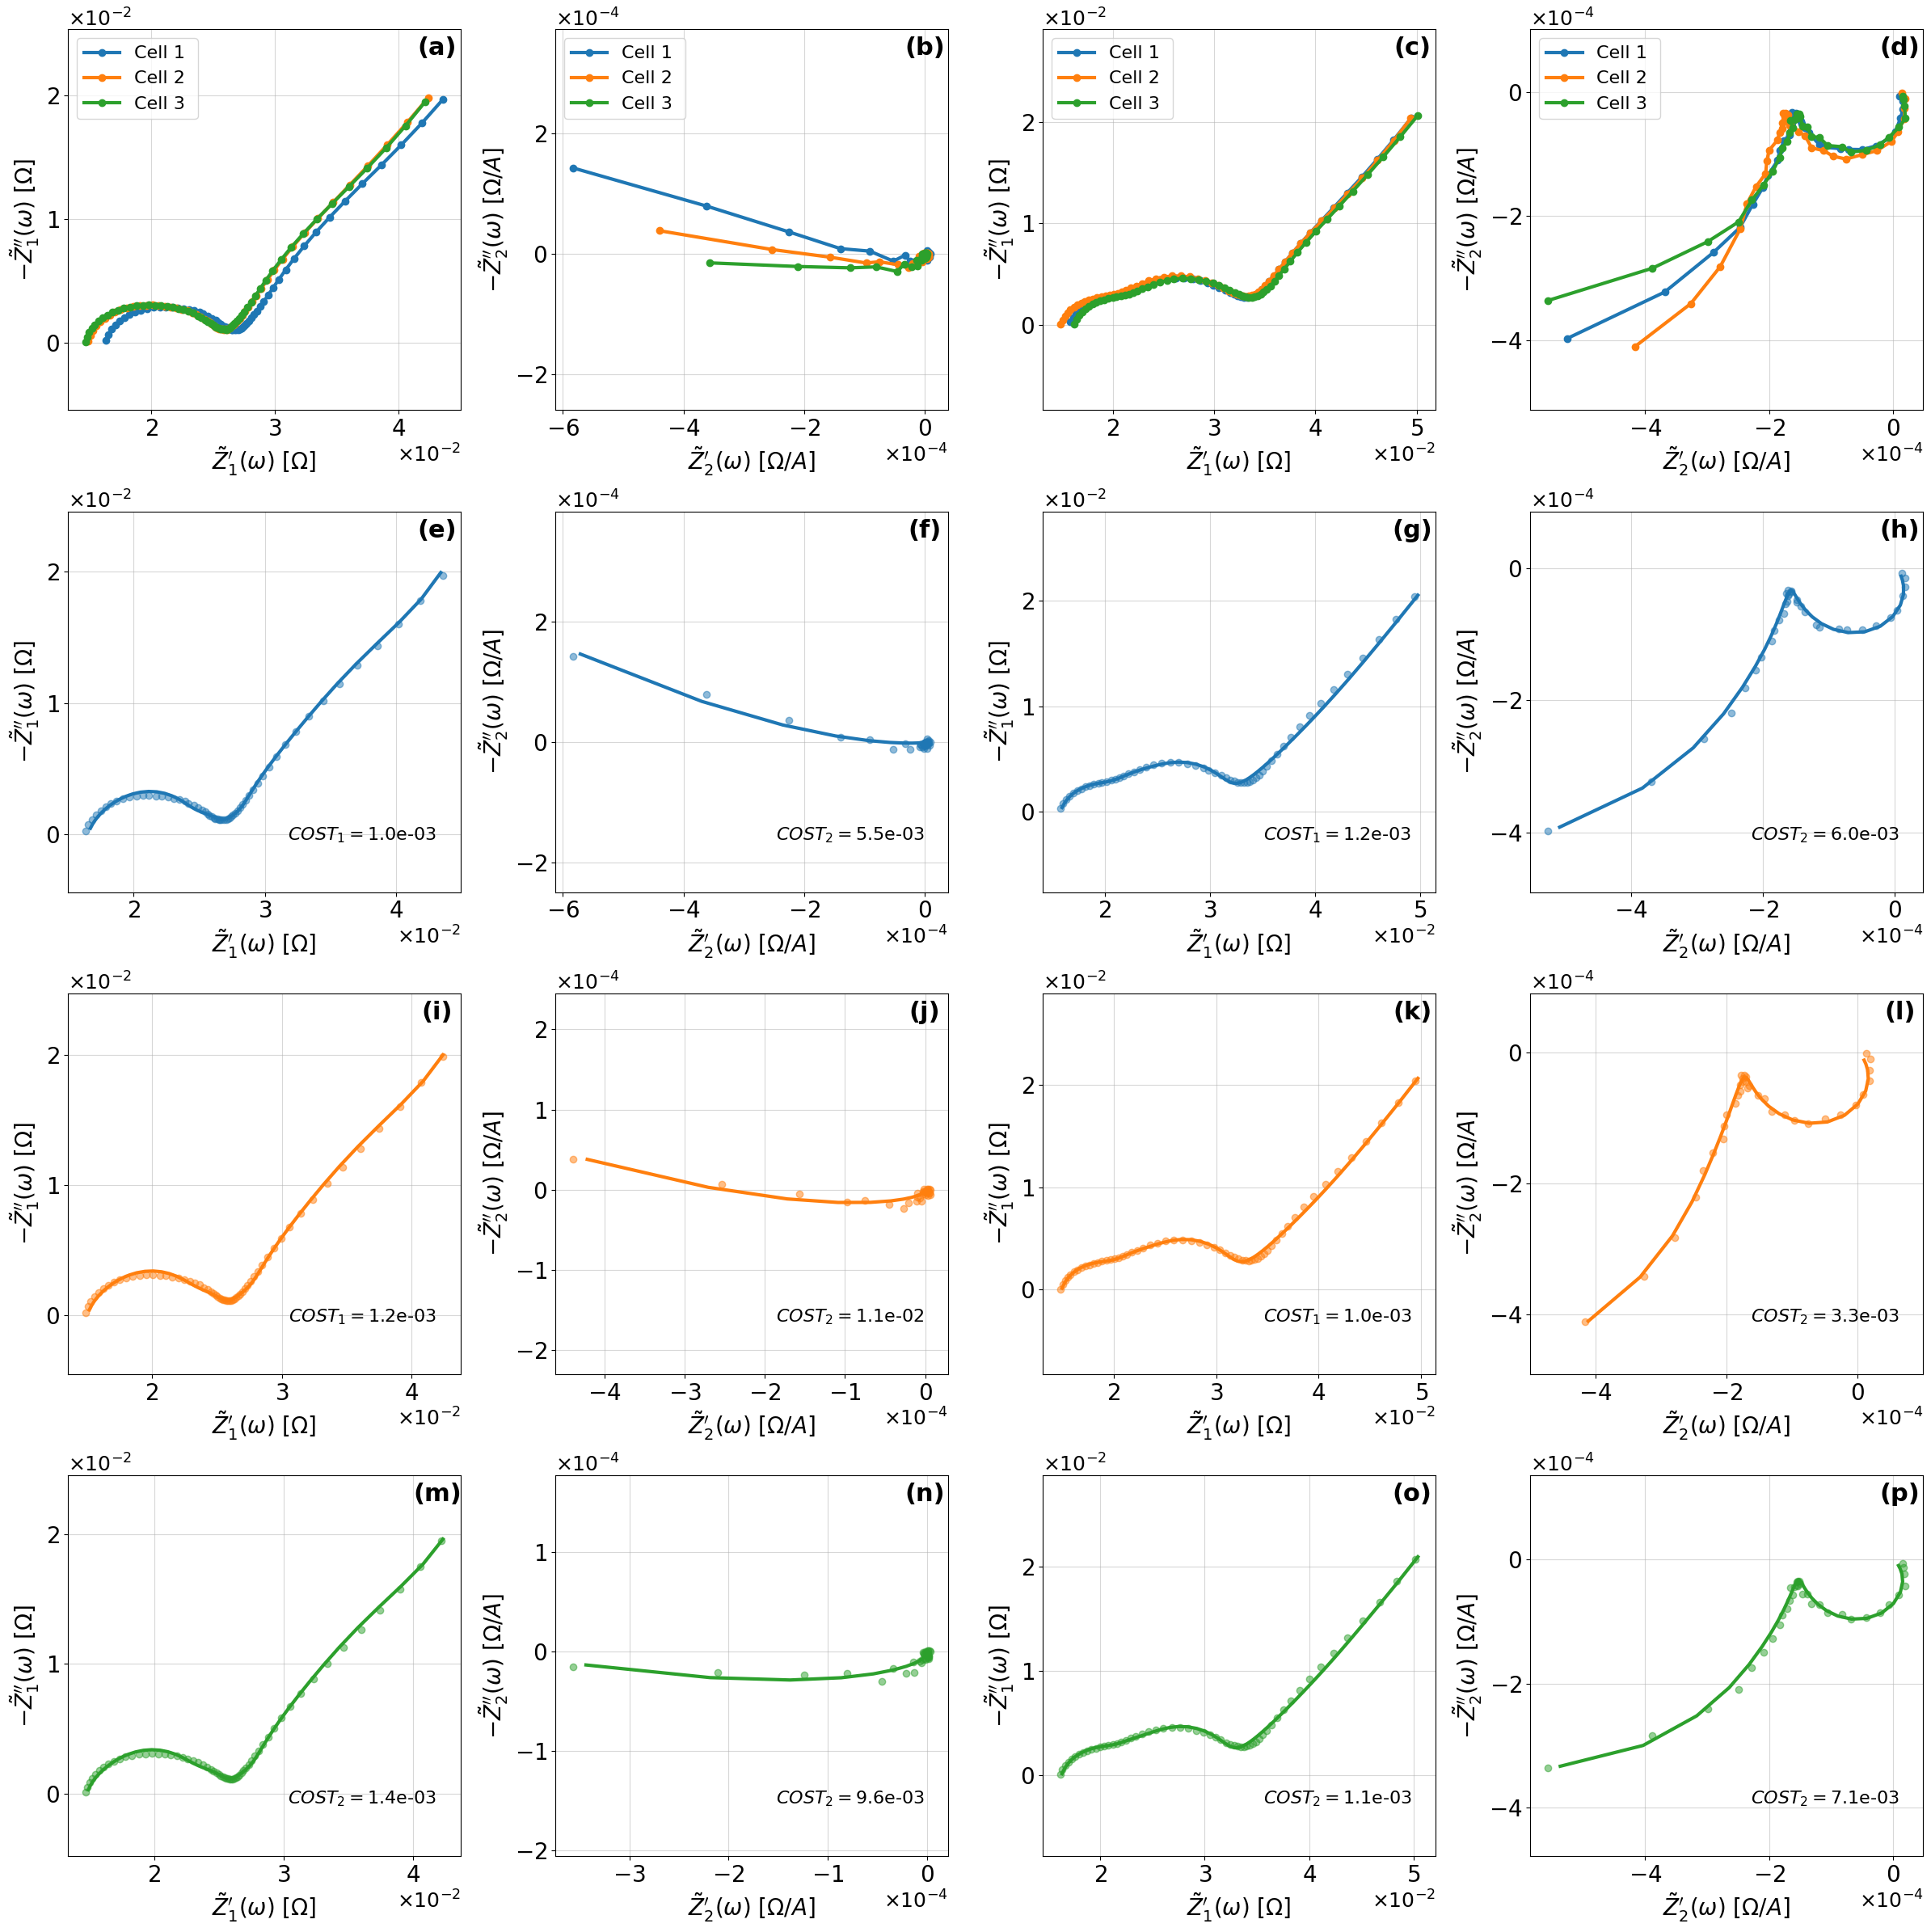

In [44]:
### full plot
fig, ax = plt.subplots(4,4,figsize=(24,24))

#### Frese Data
plot_first(ax[0,0], Z1f_1cc, fmt='-o',lw=3)
plot_first(ax[0,0], Z1f_2cc, fmt='-o',lw=3)
plot_first(ax[0,0], Z1f_3cc, fmt='-o',lw=3)
ax[0,0].legend(['Cell 1 ', 'Cell 2', 'Cell 3'],fontsize=16,loc='upper left')
ax[0,0].text(0.94, 0.95, '(a)',horizontalalignment='center',verticalalignment='center', transform=ax[0,0].transAxes, size=22, weight='bold')

plot_second(ax[0,1], Z2f_1cc, fmt='-o',lw=3)
plot_second(ax[0,1], Z2f_2cc, fmt='-o',lw=3)
plot_second(ax[0,1], Z2f_3cc, fmt='-o',lw=3)
ax[0,1].legend(['Cell 1 ', 'Cell 2', 'Cell 3'],fontsize=16,loc='upper left')
ax[0,1].text(0.94, 0.95, '(b)',horizontalalignment='center',verticalalignment='center', transform=ax[0,1].transAxes, size=22, weight='bold')

#### Fresh Fit
plot_first(ax[1,0], Z1f_1cc, fmt='o',lw=3,color ='C0',alpha = 0.5)
# plot_first(ax[1,0], Z1_1cc, fmt='-',lw=3,color ='C0')
plot_first(ax[1,0], Z1_1cc, fmt='-',lw=3,color ='C0')

# lighten_color('b', 1.6)
plot_second(ax[1,1], Z2f_1cc, fmt='o',lw=3,color ='C0',alpha = 0.5)
plot_second(ax[1,1], Z2_1cc, fmt='-',lw=3,color ='C0')

ax[1,0].text(0.75, 0.15, '$COST_{1} = $'+'{:0.1e}'.format(cost_seq(Z1f_1cc,Z1_1cc)), horizontalalignment='center',verticalalignment='center', transform=ax[1,0].transAxes,size=16)
ax[1,1].text(0.75, 0.15, '$COST_{2} = $'+'{:0.1e}'.format(cost_seq(Z2f_1cc,Z2_1cc)), horizontalalignment='center',verticalalignment='center', transform=ax[1,1].transAxes,size=16)
ax[1,0].text(0.94, 0.95, '(e)',horizontalalignment='center',verticalalignment='center', transform=ax[1,0].transAxes, size=22, weight='bold')
ax[1,1].text(0.94, 0.95, '(f)',horizontalalignment='center',verticalalignment='center', transform=ax[1,1].transAxes, size=22, weight='bold')

plot_first(ax[2,0], Z1f_2cc, fmt='o',lw=3,color ='C1',alpha = 0.5)
plot_first(ax[2,0], Z1_2cc, fmt='-',lw=3,color ='C1')
plot_second(ax[2,1], Z2f_2cc, fmt='o',lw=3,color ='C1',alpha = 0.5)
plot_second(ax[2,1], Z2_2cc, fmt='-',lw=3,color ='C1')
ax[2,0].text(0.75, 0.15, '$COST_{1} = $'+'{:0.1e}'.format(cost_seq(Z1f_2cc,Z1_2cc)), horizontalalignment='center',verticalalignment='center', transform=ax[2,0].transAxes,size=16)
ax[2,1].text(0.75, 0.15, '$COST_{2} = $'+'{:0.1e}'.format(cost_seq(Z2f_2cc,Z2_2cc)), horizontalalignment='center',verticalalignment='center', transform=ax[2,1].transAxes,size=16)
ax[2,0].text(0.94, 0.95, '(i)',horizontalalignment='center',verticalalignment='center', transform=ax[2,0].transAxes, size=22, weight='bold')
ax[2,1].text(0.94, 0.95, '(j)',horizontalalignment='center',verticalalignment='center', transform=ax[2,1].transAxes, size=22, weight='bold')

plot_first(ax[3,0], Z1f_3cc, fmt='o',lw=3,color ='C2',alpha = 0.5)
plot_first(ax[3,0], Z1_3cc, fmt='-',lw=3,color ='C2')
plot_second(ax[3,1], Z2f_3cc, fmt='o',lw=3,color ='C2',alpha = 0.5)
plot_second(ax[3,1], Z2_3cc, fmt='-',lw=3,color ='C2')
ax[3,0].text(0.75, 0.15, '$COST_{2} = $'+'{:0.1e}'.format(cost_seq(Z1f_3cc,Z1_3cc)), horizontalalignment='center',verticalalignment='center', transform=ax[3,0].transAxes,size=16)
ax[3,1].text(0.75, 0.15, '$COST_{2} = $'+'{:0.1e}'.format(cost_seq(Z2f_3cc,Z2_3cc)), horizontalalignment='center',verticalalignment='center', transform=ax[3,1].transAxes,size=16)
ax[3,0].text(0.94, 0.95, '(m)',horizontalalignment='center',verticalalignment='center', transform=ax[3,0].transAxes, size=22, weight='bold')
ax[3,1].text(0.94, 0.95, '(n)',horizontalalignment='center',verticalalignment='center', transform=ax[3,1].transAxes, size=22, weight='bold')


##### aged data
plot_first(ax[0,2], Z1a_1cc, fmt='-o',lw=3)
plot_first(ax[0,2], Z1a_2cc, fmt='-o',lw=3)
plot_first(ax[0,2], Z1a_3cc, fmt='-o',lw=3)
ax[0,2].legend(['Cell 1 ', 'Cell 2', 'Cell 3'],fontsize=16,loc='upper left')
ax[0,2].text(0.94, 0.95, '(c)',horizontalalignment='center',verticalalignment='center', transform=ax[0,2].transAxes, size=22, weight='bold')


plot_second(ax[0,3], Z2a_1cc, fmt='-o',lw=3)
plot_second(ax[0,3], Z2a_2cc, fmt='-o',lw=3)
plot_second(ax[0,3], Z2a_3cc, fmt='-o',lw=3)
ax[0,3].legend(['Cell 1 ', 'Cell 2', 'Cell 3'],fontsize=16,loc='upper left')
ax[0,3].text(0.94, 0.95, '(d)',horizontalalignment='center',verticalalignment='center', transform=ax[0,3].transAxes, size=22, weight='bold')

##### aged fit

plot_first(ax[1,2], Z1a_1cc, fmt='o',lw=3,color ='C0',alpha = 0.5)
plot_first(ax[1,2], Z1a_1cc_fit, fmt='-',lw=3,color ='C0')
plot_second(ax[1,3], Z2a_1cc, fmt='o',lw=3,color ='C0',alpha = 0.5)
plot_second(ax[1,3], Z2a_1cc_fit, fmt='-',lw=3,color ='C0')

ax[1,2].text(0.75, 0.15, '$COST_{1} = $'+'{:0.1e}'.format(cost_seq(Z1a_1cc,Z1a_1cc_fit)), horizontalalignment='center',verticalalignment='center', transform=ax[1,2].transAxes,size=16)
ax[1,3].text(0.75, 0.15, '$COST_{2} = $'+'{:0.1e}'.format(cost_seq(Z2a_1cc,Z2a_1cc_fit)), horizontalalignment='center',verticalalignment='center', transform=ax[1,3].transAxes,size=16)
ax[1,2].text(0.94, 0.95, '(g)',horizontalalignment='center',verticalalignment='center', transform=ax[1,2].transAxes, size=22, weight='bold')
ax[1,3].text(0.94, 0.95, '(h)',horizontalalignment='center',verticalalignment='center', transform=ax[1,3].transAxes, size=22, weight='bold')

plot_first(ax[2,2], Z1a_2cc, fmt='o',lw=3,color ='C1',alpha = 0.5)
plot_first(ax[2,2], Z1a_2cc_fit, fmt='-',lw=3,color ='C1')
plot_second(ax[2,3], Z2a_2cc, fmt='o',lw=3,color ='C1',alpha = 0.5)
plot_second(ax[2,3], Z2a_2cc_fit, fmt='-',lw=3,color ='C1')

ax[2,3].set_xlim([-5e-4,1e-4])
ax[2,3].set_ylim([-5e-4,1e-4])

ax[2,2].text(0.75, 0.15, '$COST_{1} = $'+'{:0.1e}'.format(cost_seq(Z1a_2cc,Z1a_2cc_fit)), horizontalalignment='center',verticalalignment='center', transform=ax[2,2].transAxes,size=16)
ax[2,3].text(0.75, 0.15, '$COST_{2} = $'+'{:0.1e}'.format(cost_seq(Z2a_2cc,Z2a_2cc_fit)), horizontalalignment='center',verticalalignment='center', transform=ax[2,3].transAxes,size=16)
ax[2,2].text(0.94, 0.95, '(k)',horizontalalignment='center',verticalalignment='center', transform=ax[2,2].transAxes, size=22, weight='bold')
ax[2,3].text(0.94, 0.95, '(l)',horizontalalignment='center',verticalalignment='center', transform=ax[2,3].transAxes, size=22, weight='bold')

plot_first(ax[3,2], Z1a_3cc, fmt='o',lw=3,color ='C2',alpha = 0.5)
plot_first(ax[3,2], Z1a_3cc_fit, fmt='-',lw=3,color ='C2')
plot_second(ax[3,3], Z2a_3cc, fmt='o',lw=3,color ='C2',alpha = 0.5)
plot_second(ax[3,3], Z2a_3cc_fit, fmt='-',lw=3,color ='C2')
ax[3,2].text(0.75, 0.15, '$COST_{2} = $'+'{:0.1e}'.format(cost_seq(Z1a_3cc,Z1a_3cc_fit)), horizontalalignment='center',verticalalignment='center', transform=ax[3,2].transAxes,size=16)
ax[3,3].text(0.75, 0.15, '$COST_{2} = $'+'{:0.1e}'.format(cost_seq(Z2a_3cc,Z2a_3cc_fit)), horizontalalignment='center',verticalalignment='center', transform=ax[3,3].transAxes,size=16)
ax[3,2].text(0.94, 0.95, '(o)',horizontalalignment='center',verticalalignment='center', transform=ax[3,2].transAxes, size=22, weight='bold')
ax[3,3].text(0.94, 0.95, '(p)',horizontalalignment='center',verticalalignment='center', transform=ax[3,3].transAxes, size=22, weight='bold')



plt.tight_layout()
plt.show()

In [45]:
# fig.savefig('figures/Figure9.png',dpi=300,bbox_inches='tight')

In [46]:
print(tabulate([],headers=['Cell 1 parameters for Fresh cell']))
header=['L0','R0','Rpore,c','Rct,c','Cdl,c','Ac','τc','κc','εc']
print(tabulate([circuit_2_1cc.parameters_[0:9]],headers=header))
header=['Rpore,a','Rct,a','Cdl,a','Aa','τa','κa','εa']
print(tabulate([circuit_2_1cc.parameters_[9:]],headers=header))

print(tabulate([]))
print(tabulate([],headers=['Cell 1 confidence interval']))
header=['L0','R0','Rpore,c','Rct,c','Cdl,c','Ac','τc','κc','εc']
print(tabulate([circuit_2_1cc.conf_[0:9]],headers=header))
header=['Rpore,a','Rct,a','Cdl,a','Aa','τa','κa','εa']
print(tabulate([circuit_2_1cc.conf_[9:]],headers=header))


Cell 1 parameters for Fresh cell
----------------------------------
         L0        R0    Rpore,c        Rct,c    Cdl,c           Ac       τc         κc      εc
-----------  --------  ---------  -----------  -------  -----------  -------  ---------  ------
5.15075e-08  0.015394  0.0705217  0.000125582  148.147  0.000927461  11.4302  -0.312325  -1e-10
  Rpore,a        Rct,a    Cdl,a           Aa      τa        κa           εa
---------  -----------  -------  -----------  ------  --------  -----------
0.0746447  0.000865442  1.76799  5.67752e-05  10.555  -302.265  9.99999e-11

Cell 1 confidence interval
----------------------------
         L0           R0     Rpore,c        Rct,c    Cdl,c           Ac       τc         κc           εc
-----------  -----------  ----------  -----------  -------  -----------  -------  ---------  -----------
1.28679e-08  0.000152786  0.00251367  2.08154e-05  54.1321  0.000227525  2.65916  0.0658062  5.97725e-17
  Rpore,a     Rct,a    Cdl,a          Aa    

In [47]:
print(tabulate([],headers=['Cell 1 parameters Aged Cell']))
header=['L0','R0','Rpore,c','Rct,c','Cdl,c','Ac','τc','κc','εc']
print(tabulate([circuit_2a_1cc.parameters_[0:9]],headers=header))
header=['Rpore,a','Rct,a','Cdl,a','Aa','τa','κa','εa']
print(tabulate([circuit_2a_1cc.parameters_[9:]],headers=header))

print(tabulate([]))
print(tabulate([],headers=['Cell 1 confidence interval']))
header=['L0','R0','Rpore,c','Rct,c','Cdl,c','Ac','τc','κc','εc']
print(tabulate([circuit_2a_1cc.conf_[0:9]],headers=header))
header=['Rpore,a','Rct,a','Cdl,a','Aa','τa','κa','εa']
print(tabulate([circuit_2a_1cc.conf_[9:]],headers=header))


Cell 1 parameters Aged Cell
-----------------------------
         L0         R0    Rpore,c       Rct,c    Cdl,c         Ac    τc       κc         εc
-----------  ---------  ---------  ----------  -------  ---------  ----  -------  ---------
1.40857e-07  0.0143467  0.0202042  0.00678196  5.52446  0.0951884  2000  4.39121  0.0654119
   Rpore,a       Rct,a     Cdl,a         Aa       τa       κa           εa
----------  ----------  --------  ---------  -------  -------  -----------
0.00992298  0.00174664  0.554507  0.0345166  621.859  16.6756  9.63856e-11

Cell 1 confidence interval
----------------------------
         L0           R0     Rpore,c       Rct,c     Cdl,c         Ac       τc        κc          εc
-----------  -----------  ----------  ----------  --------  ---------  -------  --------  ----------
3.82558e-08  0.000338872  0.00140194  0.00033874  0.460903  0.0184778  574.049  0.676643  0.00429325
   Rpore,a        Rct,a     Cdl,a          Aa       τa       κa           εa
----

In [48]:
print(tabulate([],headers=['Cell 2 parameters for Fresh cell']))
header=['L0','R0','Rpore,c','Rct,c','Cdl,c','Ac','τc','κc','εc']
print(tabulate([circuit_2_2cc.parameters_[0:9]],headers=header))
header=['Rpore,a','Rct,a','Cdl,a','Aa','τa','κa','εa']
print(tabulate([circuit_2_2cc.parameters_[9:]],headers=header))

print(tabulate([]))
print(tabulate([],headers=['Cell 1 confidence interval']))
header=['L0','R0','Rpore,c','Rct,c','Cdl,c','Ac','τc','κc','εc']
print(tabulate([circuit_2_2cc.conf_[0:9]],headers=header))
header=['Rpore,a','Rct,a','Cdl,a','Aa','τa','κa','εa']
print(tabulate([circuit_2_2cc.conf_[9:]],headers=header))


Cell 2 parameters for Fresh cell
----------------------------------
        L0         R0    Rpore,c        Rct,c    Cdl,c          Ac      τc         κc      εc
----------  ---------  ---------  -----------  -------  ----------  ------  ---------  ------
4.1798e-08  0.0139468  0.0724936  0.000154906  85.6909  0.00141692  17.426  -0.156106  -1e-10
  Rpore,a       Rct,a     Cdl,a           Aa        τa      κa           εa
---------  ----------  --------  -----------  --------  ------  -----------
0.0448564  0.00143491  0.958662  3.32873e-06  0.505936  -379.2  9.53141e-11

Cell 1 confidence interval
----------------------------
         L0           R0     Rpore,c        Rct,c    Cdl,c           Ac       τc        κc          εc
-----------  -----------  ----------  -----------  -------  -----------  -------  --------  ----------
1.31545e-08  0.000192626  0.00342233  4.24962e-05  46.3799  0.000371735  4.06165  0.112314  1.5313e-17
  Rpore,a      Rct,a    Cdl,a           Aa       τa     

In [49]:
print(tabulate([],headers=['Cell 2 parameters Aged Cell']))
header=['L0','R0','Rpore,c','Rct,c','Cdl,c','Ac','τc','κc','εc']
print(tabulate([circuit_2a_2cc.parameters_[0:9]],headers=header))
header=['Rpore,a','Rct,a','Cdl,a','Aa','τa','κa','εa']
print(tabulate([circuit_2a_2cc.parameters_[9:]],headers=header))

print(tabulate([]))
print(tabulate([],headers=['Cell 2 confidence interval']))
header=['L0','R0','Rpore,c','Rct,c','Cdl,c','Ac','τc','κc','εc']
print(tabulate([circuit_2a_2cc.conf_[0:9]],headers=header))
header=['Rpore,a','Rct,a','Cdl,a','Aa','τa','κa','εa']
print(tabulate([circuit_2a_2cc.conf_[9:]],headers=header))

Cell 2 parameters Aged Cell
-----------------------------
         L0         R0    Rpore,c       Rct,c    Cdl,c         Ac       τc      κc         εc
-----------  ---------  ---------  ----------  -------  ---------  -------  ------  ---------
8.73687e-08  0.0136579  0.0197259  0.00738495  5.08419  0.0952935  1877.87  2.3177  0.0635389
  Rpore,a       Rct,a     Cdl,a         Aa       τa       κa            εa
---------  ----------  --------  ---------  -------  -------  ------------
0.0113691  0.00161201  0.576631  0.0318494  614.767  13.0393  -3.94136e-11

Cell 2 confidence interval
----------------------------
         L0           R0      Rpore,c       Rct,c     Cdl,c         Ac       τc        κc          εc
-----------  -----------  -----------  ----------  --------  ---------  -------  --------  ----------
1.66224e-08  0.000195875  0.000878317  0.00021168  0.239696  0.0136275  400.732  0.269274  0.00251888
    Rpore,a        Rct,a      Cdl,a          Aa       τa       κa       

In [50]:
print(tabulate([],headers=['Cell 3 parameters for Fresh Cell']))
header=['L0','R0','Rpore,c','Rct,c','Cdl,c','Ac','τc','κc','εc']
print(tabulate([circuit_2_3cc.parameters_[0:9]],headers=header))
header=['Rpore,a','Rct,a','Cdl,a','Aa','τa','κa','εa']
print(tabulate([circuit_2_3cc.parameters_[9:]],headers=header))

print(tabulate([]))
print(tabulate([],headers=['Cell 1 confidence interval']))
header=['L0','R0','Rpore,c','Rct,c','Cdl,c','Ac','τc','κc','εc']
print(tabulate([circuit_2_3cc.conf_[0:9]],headers=header))
header=['Rpore,a','Rct,a','Cdl,a','Aa','τa','κa','εa']
print(tabulate([circuit_2_3cc.conf_[9:]],headers=header))


Cell 3 parameters for Fresh Cell
----------------------------------
         L0         R0    Rpore,c        Rct,c    Cdl,c          Ac       τc         κc            εc
-----------  ---------  ---------  -----------  -------  ----------  -------  ---------  ------------
3.02047e-08  0.0138432  0.0732308  0.000173189  88.4245  0.00138726  17.1506  -0.178554  -9.43921e-11
  Rpore,a       Rct,a    Cdl,a           Aa        τa        κa            εa
---------  ----------  -------  -----------  --------  --------  ------------
0.0477058  0.00132733  1.09494  1.43738e-06  0.416459  -947.635  -9.86926e-11

Cell 1 confidence interval
----------------------------
         L0           R0     Rpore,c        Rct,c    Cdl,c           Ac       τc        κc           εc
-----------  -----------  ----------  -----------  -------  -----------  -------  --------  -----------
9.67506e-09  0.000165303  0.00328271  3.88567e-05  39.8273  0.000332325  3.67603  0.139232  2.62985e-17
  Rpore,a      Rct,a   

In [51]:
print(tabulate([],headers=['Cell 3 parameters Aged Cell']))
header=['L0','R0','Rpore,c','Rct,c','Cdl,c','Ac','τc','κc','εc']
print(tabulate([circuit_2a_3cc.parameters_[0:9]],headers=header))
header=['Rpore,a','Rct,a','Cdl,a','Aa','τa','κa','ε']
print(tabulate([circuit_2a_3cc.parameters_[9:]],headers=header))

print(tabulate([]))
print(tabulate([],headers=['Cell 3 confidence interval']))
header=['L0','R0','Rpore,c','Rct,c','Cdl,c','Ac','τc','κc','εc']
print(tabulate([circuit_2a_3cc.conf_[0:9]],headers=header))
header=['Rpore,a','Rct,a','Cdl,a','Aa','τa','κa','εa']
print(tabulate([circuit_2a_3cc.conf_[9:]],headers=header))

Cell 3 parameters Aged Cell
-----------------------------
        L0         R0    Rpore,c       Rct,c    Cdl,c        Ac    τc       κc         εc
----------  ---------  ---------  ----------  -------  --------  ----  -------  ---------
1.1733e-07  0.0149293  0.0175659  0.00717663  5.07082  0.100139  2000  4.00774  0.0613829
   Rpore,a       Rct,a    Cdl,a        Aa       τa       κa      ε
----------  ----------  -------  --------  -------  -------  -----
0.00925648  0.00201077   0.5087  0.031257  539.117  17.1614  1e-10

Cell 3 confidence interval
----------------------------
         L0          R0    Rpore,c        Rct,c     Cdl,c         Ac       τc        κc          εc
-----------  ----------  ---------  -----------  --------  ---------  -------  --------  ----------
3.00388e-08  0.00029563  0.0014118  0.000323026  0.375255  0.0200722  551.693  0.566288  0.00390632
   Rpore,a        Rct,a    Cdl,a          Aa       τa       κa          εa
----------  -----------  -------  -----

## Supplementary Plot(Bode plot show case for cell to cell variation at 30% SOC)

#### Cell 1 fresh

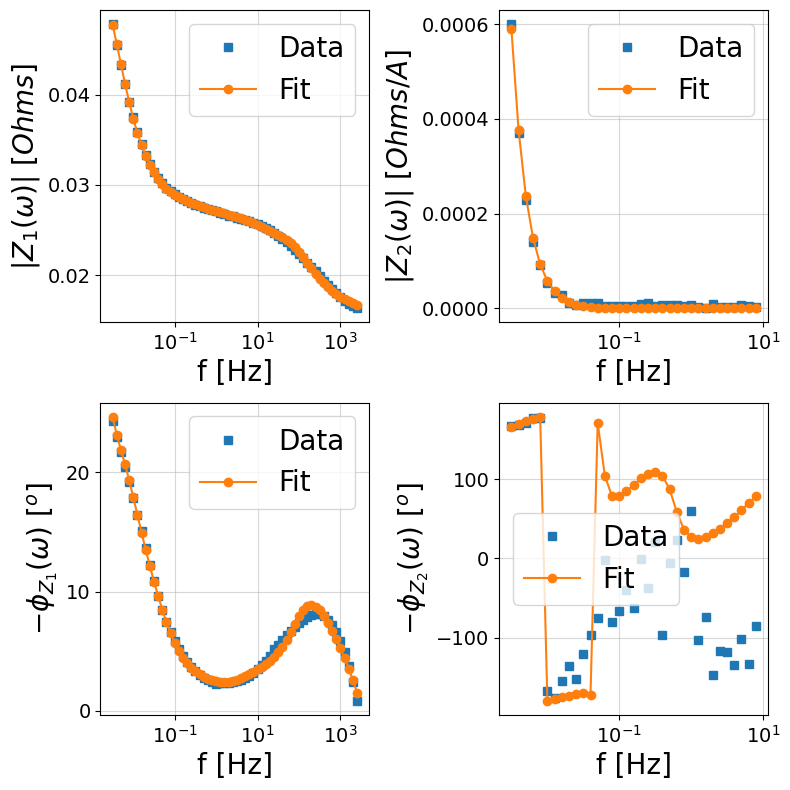

In [52]:
circuit_2_1cc.plot(f_data =f1_1cc, Z1_data=Z1f_1cc,Z2_data=Z2f_1cc,kind='bode',fmt='-o')
plt.tight_layout()
plt.show()


#### Cell 2 fresh

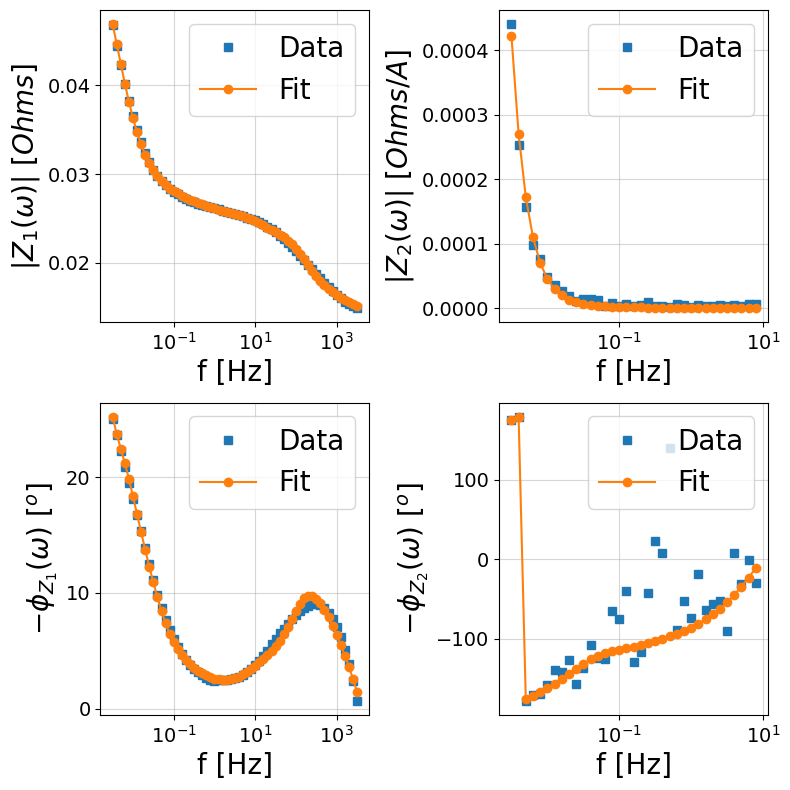

In [53]:
circuit_2_2cc.plot(f_data =f1_2cc, Z1_data=Z1f_2cc,Z2_data=Z2f_2cc,kind='bode',fmt='-o')
plt.tight_layout()
plt.show()


#### Cell 3 fresh

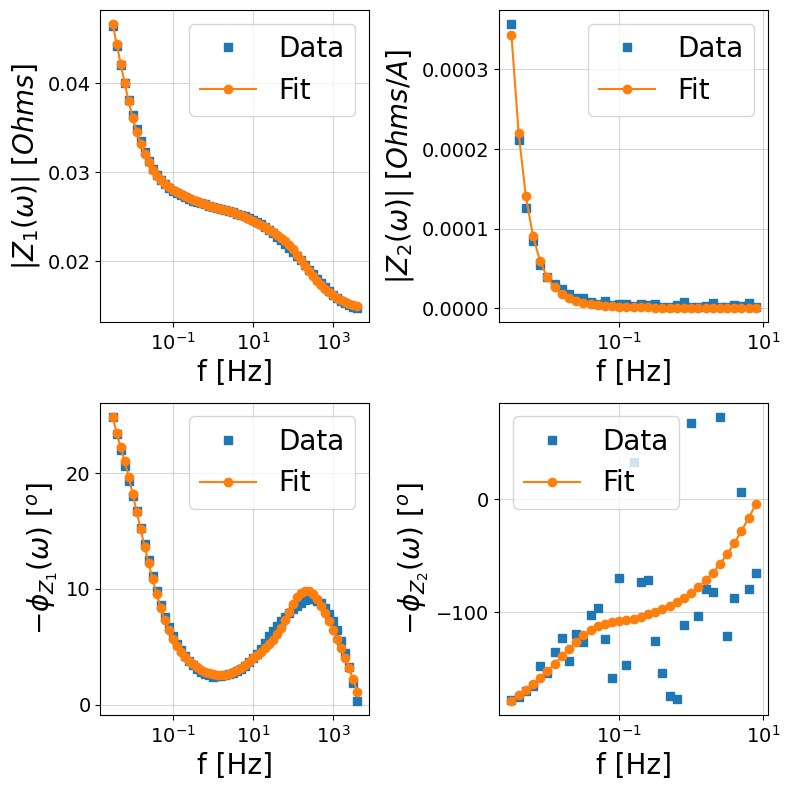

In [54]:
circuit_2_3cc.plot(f_data =f1_3cc, Z1_data=Z1f_3cc,Z2_data=Z2f_3cc,kind='bode',fmt='-o')
plt.tight_layout()
plt.show()


#### Cell 1 aged

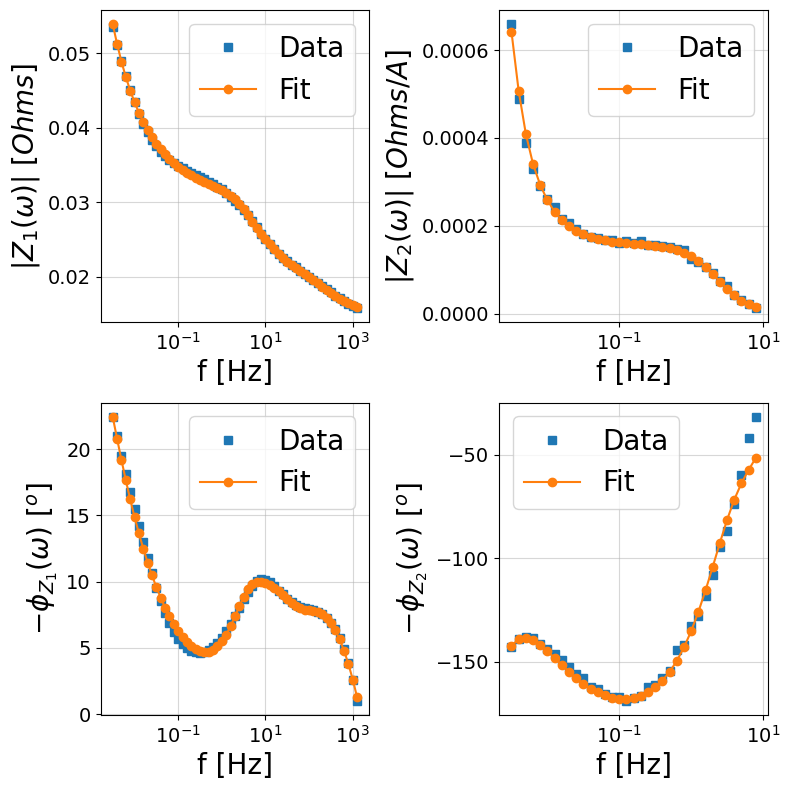

In [55]:
circuit_2a_1cc.plot(f_data =f1a_1cc, Z1_data=Z1a_1cc,Z2_data=Z2a_1cc,kind='bode',fmt='-o')
plt.tight_layout()
plt.show()


#### Cell 2 aged

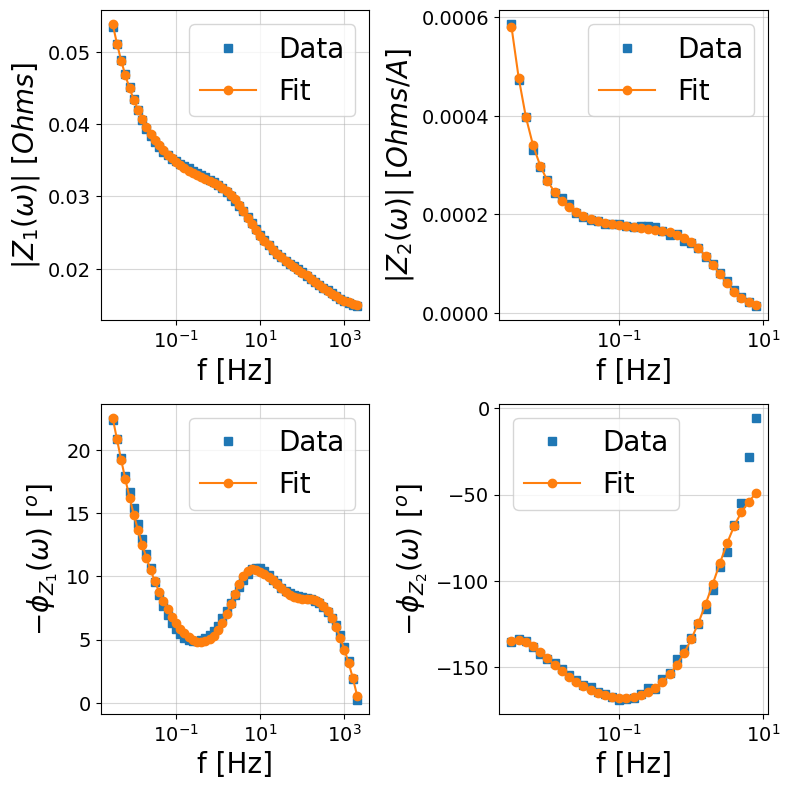

In [56]:
circuit_2a_2cc.plot(f_data =f1a_2cc, Z1_data=Z1a_2cc,Z2_data=Z2a_2cc,kind='bode',fmt='-o')
plt.tight_layout()
plt.show()


#### Cell 3 aged

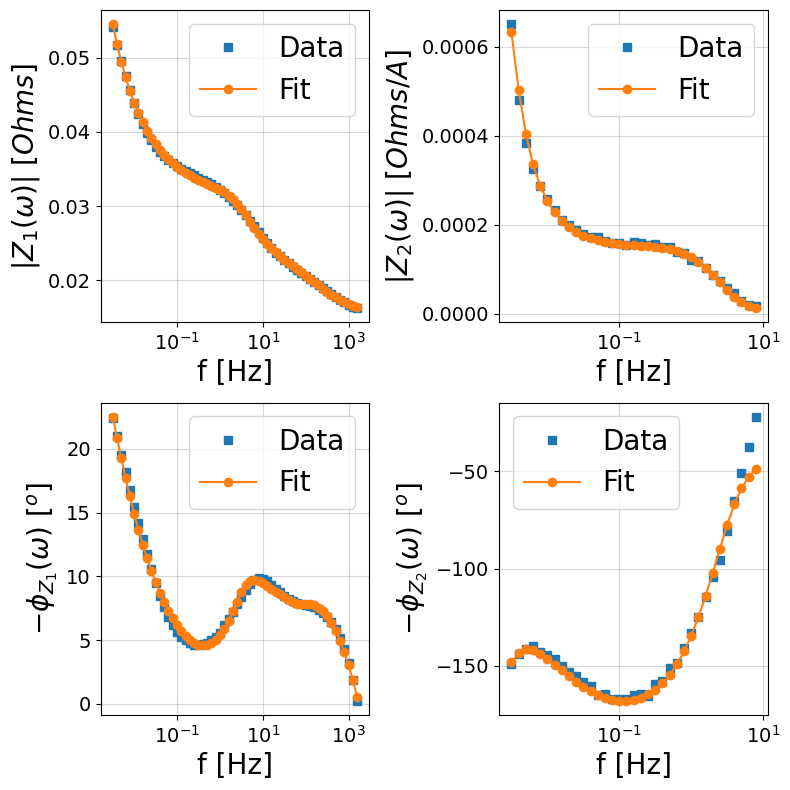

In [57]:
circuit_2a_3cc.plot(f_data =f1a_3cc, Z1_data=Z1a_3cc,Z2_data=Z2a_3cc,kind='bode',fmt='-o')
plt.tight_layout()
plt.show()
